## House Price Prediction - Exploratory Data Analysis

In [2]:
# Import Required Libraries
# For dataset reading and manipulating
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read House Price Train Dataset
df_train = pd.read_csv('train.csv', index_col='Id')

In [4]:
# Let's check the shape and data types in train set
print(df_train.shape)
print(df_train.info())

(1460, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd    

There are total 1460 records for 81 features (including index).  
Also, no time or date related features included in this.  
Also, we have observed that count of data in less for most of the columns. Let us work on this missing data first.

In [5]:
# Take Backup of this train set
df_train_bck = df_train.copy()
df_train_bck.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

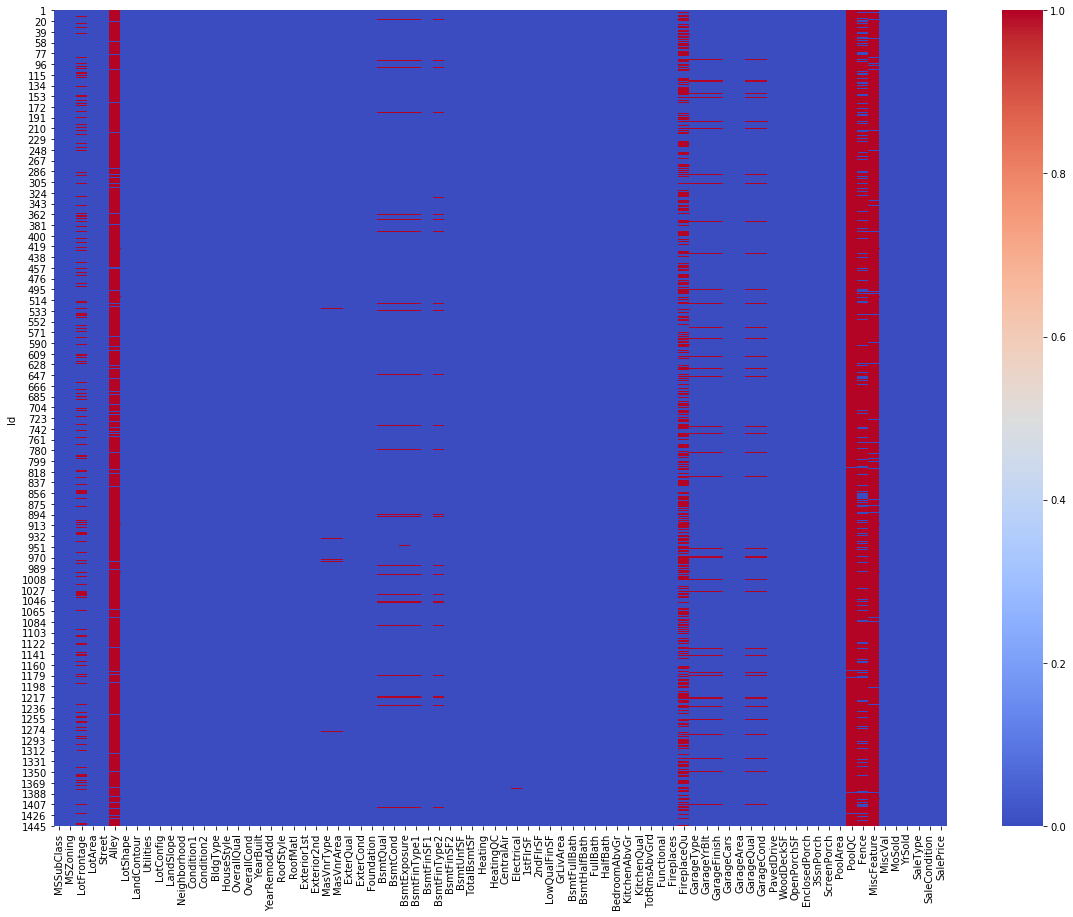

In [6]:
# Visulaize missing data on heatmap
fig = plt.figure(figsize=(20,15))

sns.heatmap(df_train.isnull(), cmap='coolwarm')

plt.show()

There are many missing values for features like Alley, FireplaceQu, PoolQC, Fence & MiscFeature. While others features have less missing values. Let us check the percentage of missing values right away.

In [7]:
# Missing values percentage
missing_col = []

for col in df_train.columns:
    missing_pct = np.mean(df_train[col].isnull())
    if missing_pct != 0:
        missing_col.append(col)
        print('{} - {}%'.format(col, round(missing_pct*100)))

LotFrontage - 18.0%
Alley - 94.0%
MasVnrType - 1.0%
MasVnrArea - 1.0%
BsmtQual - 3.0%
BsmtCond - 3.0%
BsmtExposure - 3.0%
BsmtFinType1 - 3.0%
BsmtFinType2 - 3.0%
Electrical - 0.0%
FireplaceQu - 47.0%
GarageType - 6.0%
GarageYrBlt - 6.0%
GarageFinish - 6.0%
GarageQual - 6.0%
GarageCond - 6.0%
PoolQC - 100.0%
Fence - 81.0%
MiscFeature - 96.0%


Here, PoolQC has 100% missing data while MiscFeature has the 2nd most missing data i.e. 96% and after this it is Fence on 81%.  
Let us visualize the missing data on chart.

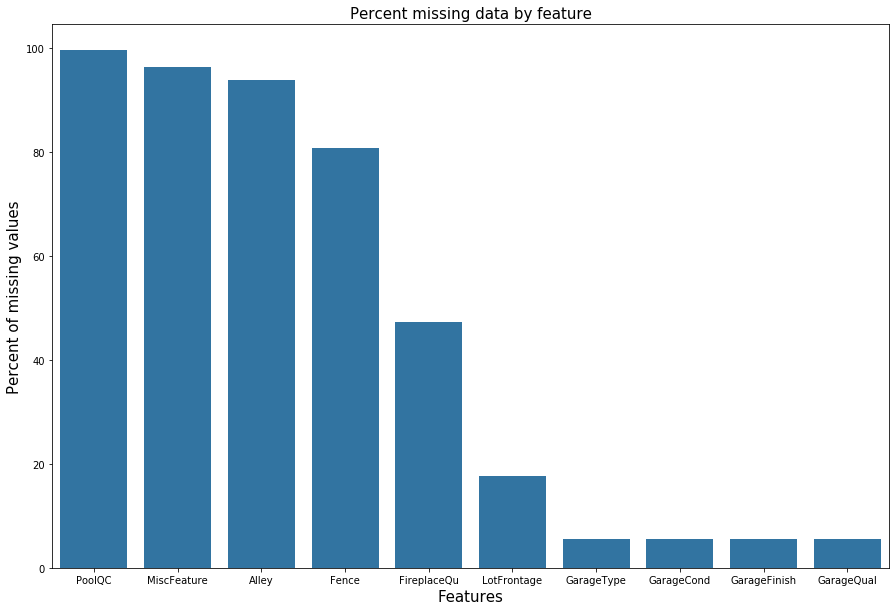

In [8]:
# Let's plot these missing values(%) vs column_names
missing_values_count = (df_train.isnull().sum() / df_train.isnull().count()*100).sort_values(ascending=False)

plt.figure(figsize=(15,10))

base_color = sns.color_palette()[0]
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color = base_color)

plt.show()

From above chart, we can see that the features **'PoolQC'**, **'MiscFeature'**, **'Alley'** & **'Fence'** have more than 80% missing data.  
File **'data_description.txt'** cab be used to check meaning and significance of these fields in predicting the sale price of the house.  

In Data_description file for most of the columns, it is mentioned that if the there are no value mentioned then the data present in the file should be **'0'** for numeric columns i.e. value of that feature is zero and **'NA'** for non-numeric columns i.e. feature is either not present or not applicable.  
Let us divide the missing columns in numeric and non-numeric data.

In [9]:
num_data = []
non_num_data = []

for col in missing_col:
    if df_train[col].dtype is pd.np.dtype(object):
        non_num_data.append(col)
    else:
        num_data.append(col)

print(num_data)
print(non_num_data)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Let us first check the numeric columns in description file:
1. **Lot Frontage:** If there is no street connected to house, then the Lot Frontage should be '0'.
2. **MasVnrArea:** If there is no Masonry Veneer Type mentioned, then the area should be '0'.
3. **GarageYrBlt:** If there is no Garage, then Garage Built Year should be '0'.

#### LotFrontage

In [10]:
# The NaN values actually represents that there is no street connected to the property. Replace them with 0
df_train['LotFrontage'].fillna(0, inplace=True)

#### Masonry Veneer Area (MasVnrArea)

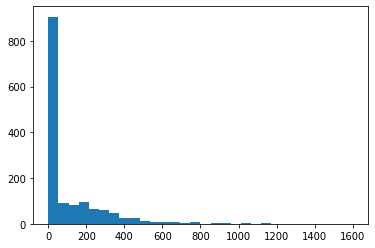

In [11]:
# Check what kind of Masonry Veneer Type does houses have
df_train['MasVnrArea'].hist(grid=False, bins=30)

In [12]:
# Maximum of the houses does not have any Masonry Veneer Type, so let's replace the missing values with 0
df_train['MasVnrArea'].fillna(0, inplace=True)

#### Garage Year Built (GarageYrBlt)

In [13]:
# If the house is having garage then it definitely have the year in which it was built. 
# If no Garage then year built will be 0. Let us replace the missing va

for i in df_train['GarageType'].unique():
    print(i,df_train[df_train['GarageType']==i]['GarageYrBlt'].unique())

Attchd [2003. 1976. 2001. 2000. 1993. 2004. 1973. 1939. 2006. 1960. 1970. 1958.
 1930. 2002. 1968. 2007. 2008. 1957. 1966. 1959. 2005. 1995. 1954. 1965.
 1983. 1997. 1981. 1964. 1999. 1998. 1945. 1953. 1989. 1991. 1961. 1977.
 1985. 1979. 2009. 1962. 1990. 1969. 1967. 1975. 1971. 1984. 1955. 1987.
 1986. 1950. 1988. 1972. 1924. 1996. 1940. 1980. 1994. 1978. 1982. 1992.
 1949. 1963. 2010. 1956. 1942. 1915. 1941. 1938. 1974. 1948. 1931. 1923.
 1936. 1946. 1925. 1920.]
Detchd [1998. 1931. 1965. 1962. 1991. 2004. 2005. 1920. 1953. 1977. 1985. 1973.
 2006. 1935. 1990. 1987. 1915. 1956. 1948. 1966. 1974. 2009. 1950. 1921.
 1900. 1951. 1954. 1945. 1999. 1979. 2000. 1963. 1936. 1923. 1926. 2003.
 1993. 1916. 1932. 1989. 1918. 1980. 1940. 1971. 1949. 1910. 1939. 1978.
 1970. 1984. 1997. 1961. 1925. 1941. 1930. 2002. 1972. 1964. 1924. 1927.
 1947. 1937. 1981. 1976. 1996. 1995. 1952. 1928. 1967. 1922. 1957. 1955.
 2007. 1988. 1986. 1906. 1968. 1994. 1958. 1914. 1969. 2008. 1983. 1946.
 1934. 1908

In [14]:
# There are no nan values for any mentioned values, so values are null for houses with no garage.
# Hence, we will replace the null values with 0.
df_train['GarageYrBlt'].fillna(0, inplace=True)

#### Alley

In [15]:
print('Unique values in Alley are {}'.format(df_train['Alley'].unique()))

Unique values in Alley are [nan 'Grvl' 'Pave']


In [16]:
# In data_description, the values can be either Grvl or Pave or NA. Let us replace the null values with 'NA'.
df_train['Alley'].fillna('NA', inplace=True)

#### Masonry Veneer Type (MasVnrType)

In [17]:
# Replace Null values for 'MasVnrType' with 'None'. 
df_train['MasVnrType'].fillna('None', inplace=True)

#### Basement

In [18]:
# We will assume that if the value is Nan, there is no basment and hence will replace it with 'NA'
# Filling nulls for rating of Basement Quality, Condition, Exposure & Finish Area

df_train.fillna({'BsmtQual':'NA', 'BsmtCond':'NA', 'BsmtExposure':'NA', 'BsmtFinType1':'NA', 'BsmtFinType2':'NA'}, inplace=True)

#### Electrical

In [19]:
# There is only one missing value for this feature. Let's replace it with most common kind of Electricals used.
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [20]:
# Here, the mot standard is 'Standard Circuit Breakers & Romex' and hence replacing Nan value with 'SBrkr'.
df_train['Electrical'].fillna('SBrkr', inplace=True)

#### Fire Place

In [21]:
# Check the fireplace Quality for number for fireplaces
for i in df_train['Fireplaces'].unique():
    print(i,df_train[df_train['Fireplaces']==i]['FireplaceQu'].unique())

0 [nan]
1 ['TA' 'Gd' 'Fa' 'Ex' 'Po']
2 ['TA' 'Gd' 'Fa' 'Ex']
3 ['Gd' 'Ex' 'Fa' 'TA']


In [22]:
# The houses with no fireplaces have null values in Fireplace Quality. So, we will replace them by 'NA'.
df_train['FireplaceQu'].fillna('NA', inplace=True)

#### Garage

In [23]:
# Let's check the Garage types available
df_train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [24]:
# Nan represents no garage and so replace this null value with 'NA'.
df_train['GarageType'].fillna('NA', inplace=True)

In [25]:
# Let us also check other features related to the Garage Type
for i in df_train['GarageType'].unique():
    print(i, df_train[df_train['GarageType']==i][['GarageFinish', 'GarageQual', 'GarageCond']].count())

Attchd GarageFinish    870
GarageQual      870
GarageCond      870
dtype: int64
Detchd GarageFinish    387
GarageQual      387
GarageCond      387
dtype: int64
BuiltIn GarageFinish    88
GarageQual      88
GarageCond      88
dtype: int64
CarPort GarageFinish    9
GarageQual      9
GarageCond      9
dtype: int64
NA GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64
Basment GarageFinish    19
GarageQual      19
GarageCond      19
dtype: int64
2Types GarageFinish    6
GarageQual      6
GarageCond      6
dtype: int64


In [26]:
# From above report, the count for no garage house is zero i.e. null values. Replace these null values as 'NA'.
df_train.fillna({'GarageFinish':'NA', 'GarageQual':'NA', 'GarageCond':'NA'}, inplace=True)

#### Pool

In [27]:
# Check unique values
df_train.groupby('PoolArea')['PoolQC'].unique()

PoolArea
0      [nan]
480     [Gd]
512     [Ex]
519     [Fa]
555     [Ex]
576     [Gd]
648     [Fa]
738     [Gd]
Name: PoolQC, dtype: object

In [28]:
df_train['PoolQC'].fillna('NA', inplace=True)

#### Miscellaneous Feature (MiscFeature)

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
                      mean  count
MiscFeature                      
Gar2         170750.000000      2
Othr          94000.000000      2
Shed         151187.612245     49
TenC         250000.000000      1


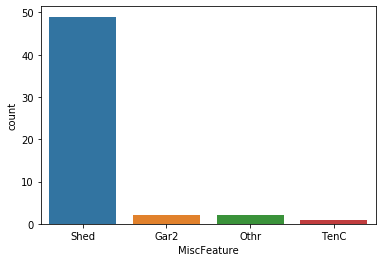

In [29]:
# These are the features which are not mentioned in List out the Miscellaneous fetures mentioned in this dataframe
print(df_train['MiscFeature'].unique())

print(df_train.groupby('MiscFeature')['SalePrice'].agg(['mean','count']))
sns.countplot(df_train['MiscFeature'])

Here, price range is varying according to the Miscellaneous features present for the houses, so let's replace the Nan values with 'NA' as mentioned in Description document.

In [30]:
df_train['MiscFeature'].fillna('NA', inplace=True)

#### Fence

In [31]:
# Let's see the Fence types mentioned
df_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [32]:
# Null values again represents no fence. Replace them with 'NA'.
df_train['Fence'].fillna('NA', inplace=True)

In [33]:
# Now we have filled all the columns and we have no missing data in it.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [34]:
# Let's check with the duplicate data if any
df_train[df_train.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]

#### Zero rows represents no duplicates and we are good to go ahead for exploring the dataset.  
#### Before that, let's check which columns which have 95% same data in it.

In [35]:
for col in df_train.columns:
    pct = (df_train[col].value_counts() / len(df_train.index)).iloc[0]
    
    if pct >= 0.95:
        print('Feature {0} : {1:.2f}% similar data'.format(col, pct*100))


Feature Street : 99.59% similar data
Feature Utilities : 99.93% similar data
Feature Condition2 : 98.97% similar data
Feature RoofMatl : 98.22% similar data
Feature Heating : 97.81% similar data
Feature LowQualFinSF : 98.22% similar data
Feature KitchenAbvGr : 95.34% similar data
Feature 3SsnPorch : 98.36% similar data
Feature PoolArea : 99.52% similar data
Feature PoolQC : 99.52% similar data
Feature MiscFeature : 96.30% similar data
Feature MiscVal : 96.44% similar data


Let us study these features and decide if we really need them for predicting Sale Price or not.

In [36]:
# Let's get this copy of dataframe in csv file to doing EDA.
df_train.to_csv('Clean_train_data.csv')

Now, Let's explore the fields in this dataframe.  
#### Sale Price

In [37]:
# Get the statistics of this feature to see the range of prices present
print(df_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Here, the maximum price is way too high as compared to mean. Let's visualize and check how many houses have this high price.

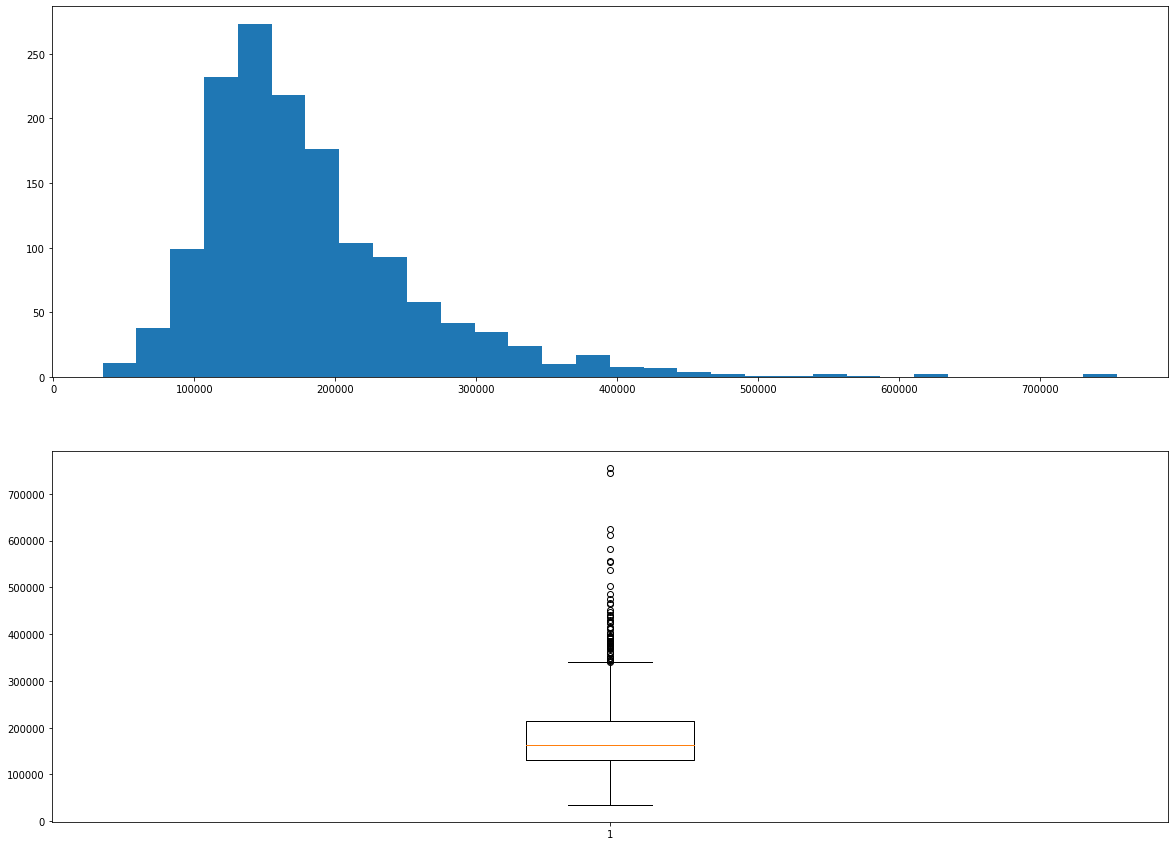

In [38]:
# Visualize 
fig, axes = plt.subplots(2, 1, figsize=(20,15))

axes[0].hist(df_train['SalePrice'], bins=30)

axes[1].boxplot(df_train['SalePrice'])

plt.show()

Here, we can see that there are only 2 houses which arer sold with price above $700K. Let us try to check data for the same.

In [39]:
df_train[df_train['SalePrice']>700000]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
692           60       RL        104.0    21535   Pave    NA      IR1   
1183          60       RL        160.0    15623   Pave    NA      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
692          Lvl    AllPub    Corner  ...        0     NA     NA          NA   
1183         Lvl    AllPub    Corner  ...      555     Ex  MnPrv          NA   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
692        0      1    2007        WD         Normal     755000  
1183       0      7    2007        WD        Abnorml     745000  

[2 rows x 80 columns]

Let us check the other features and then decide if we should consider these records or not.  
Start with some basic feature that common person will check.  
#### House Style

In [40]:
print('List of unique House Styles for Sale are {}'.format(df_train['HouseStyle'].unique()))

print('\nAverage Sale Price for each House Style is as follows:')

df_train.groupby('HouseStyle')['SalePrice'].agg(['mean','count'])

List of unique House Styles for Sale are ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

Average Sale Price for each House Style is as follows:


mean  count
HouseStyle                      
1.5Fin      143116.740260    154
1.5Unf      110150.000000     14
1Story      175985.477961    726
2.5Fin      220000.000000      8
2.5Unf      157354.545455     11
2Story      210051.764045    445
SFoyer      135074.486486     37
SLvl        166703.384615     65

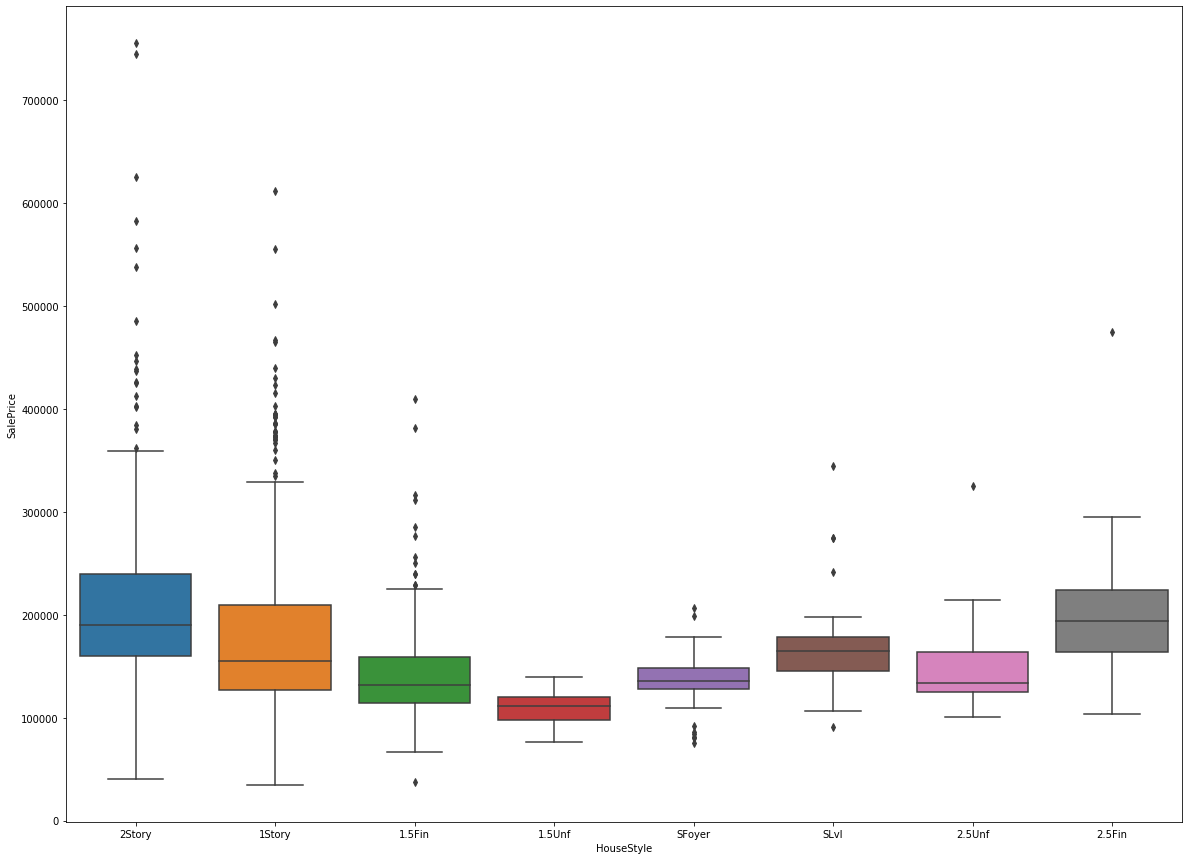

In [41]:
# Let's visualize the same 
fig = plt.figure(figsize=(20,15))

sns.boxplot(df_train['HouseStyle'], df_train['SalePrice'])

plt.show()

From above plot we can say that there is defiitely a lot of variation depending on the House Style.  
Let us also check the **'Building Type'** in which these houses are.

Unique Building Types mentioned in dataset are ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


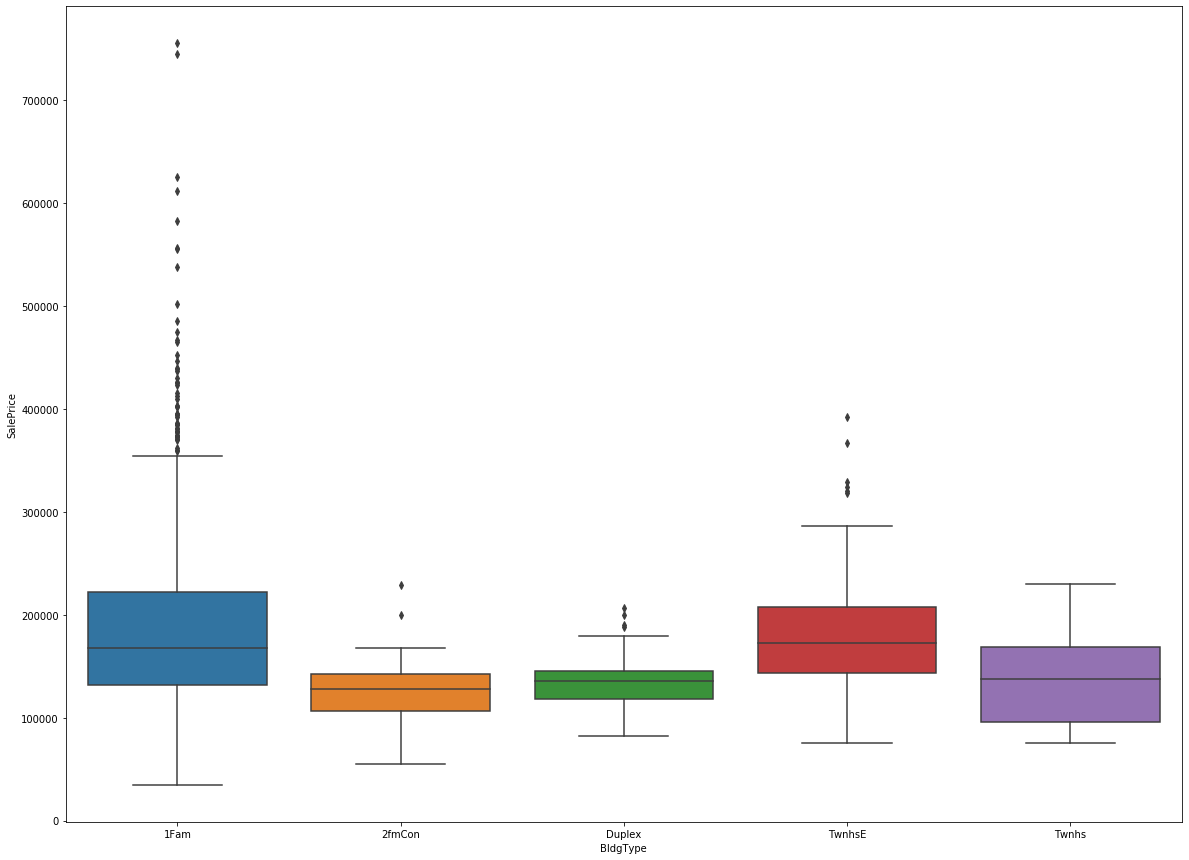

In [42]:
print('Unique Building Types mentioned in dataset are {}'.format(df_train['BldgType'].unique()))
fig = plt.figure(figsize=(20,15))

sns.boxplot(df_train['BldgType'], df_train['SalePrice'])

plt.show()

Maximum sales are for **'Single Family Detached'** Building Type, but we can see lot of variations in prices with respect to the rest of Buliding Types.  
Let's check other feature **'MSSubClass'** which is related to house style and visualize the effect on Sale Price.

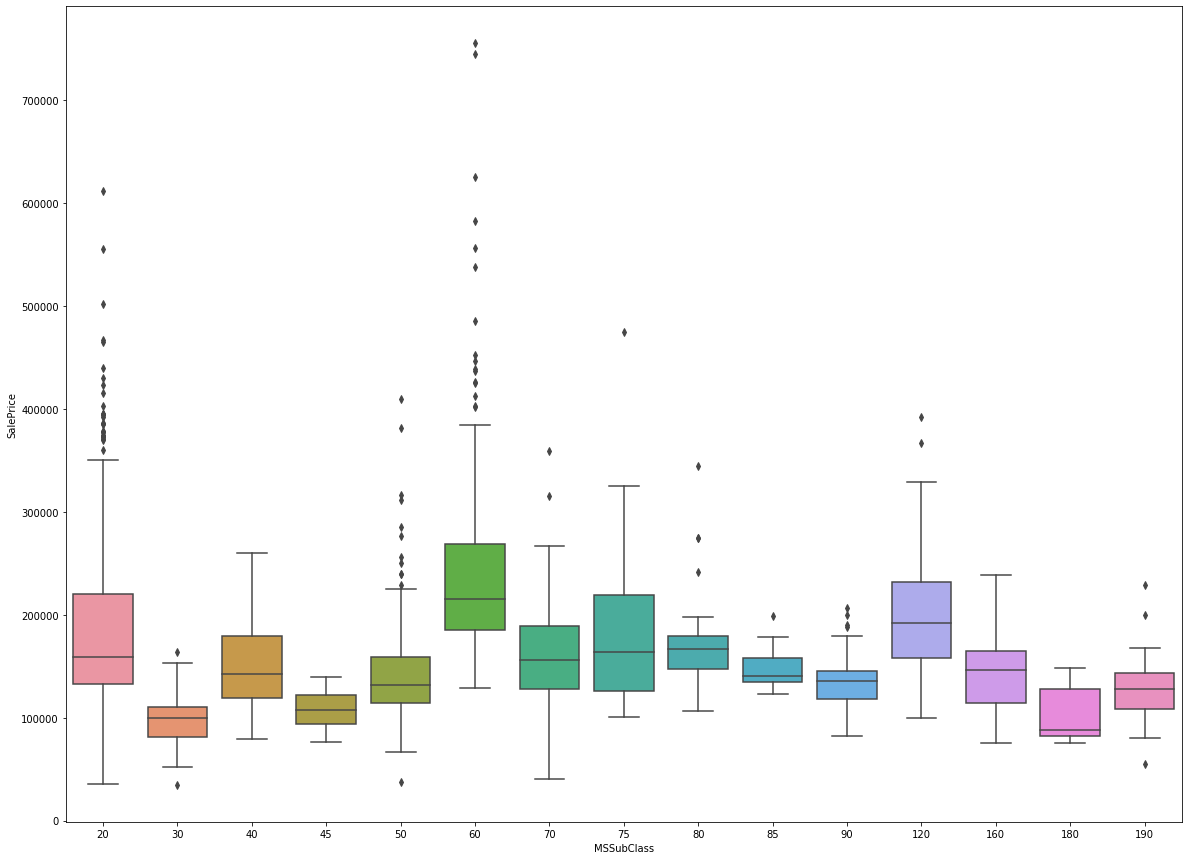

In [43]:
# MSSubClass
fig = plt.figure(figsize=(20,15))

sns.boxplot(df_train['MSSubClass'], df_train['SalePrice'])

plt.show()

This field has more variation than the House Style. Let's check how Location (zone) of the house is affecting the Sale Price.   
#### Location of House (MSZoning)

In [44]:
print('List of Zones listed in DataFrame are: {}'.format(df_train['MSZoning'].unique()))

print('\nAverage price of houses in each zone and each SubClass is as follows:')

df_train.groupby(['MSZoning', 'MSSubClass'])['SalePrice'].agg(['mean','count'])

List of Zones listed in DataFrame are: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Average price of houses in each zone and each SubClass is as follows:


mean  count
MSZoning MSSubClass                      
C (all)  20           45652.000000      2
         30           57950.000000      2
         50           91044.000000      4
         70           40000.000000      1
         190         133900.000000      1
FV       20          226289.538462     13
         60          248558.600000     25
         120         226140.000000      5
         160         164749.318182     22
RH       20          102966.666667      3
         30           79000.000000      1
         45           76000.000000      1
         50          159434.000000      1
         70          124533.333333      3
         90          144666.666667      3
         120         157000.000000      2
         190         180000.000000      2
RL       20          186467.039370    508
         30           96481.212121     33
         40          196500.000000      2
         45          110050.000000      4
         50          156277.477273     88
         60          239544.457875    273
         70          199808.733333     30
         75          184750.000000      6
         80          169736.551724     58
         85          147810.000000     20
         90          132379.906977     43
         120         210029.491525     59
         160         164909.090909     11
         190         134662.500000     16
RM       20          121327.500000     10
         30           97983.969697     33
         40          115750.000000      2
         45          112414.285714      7
         50          124698.039216     51
         60          135000.000000      1
         70          138403.192308     26
         75          197050.000000     10
         90          136300.000000      6
         120         172920.952381     21
         160         109876.666667     30
         180         102300.000000     10
         190         112718.181818     11

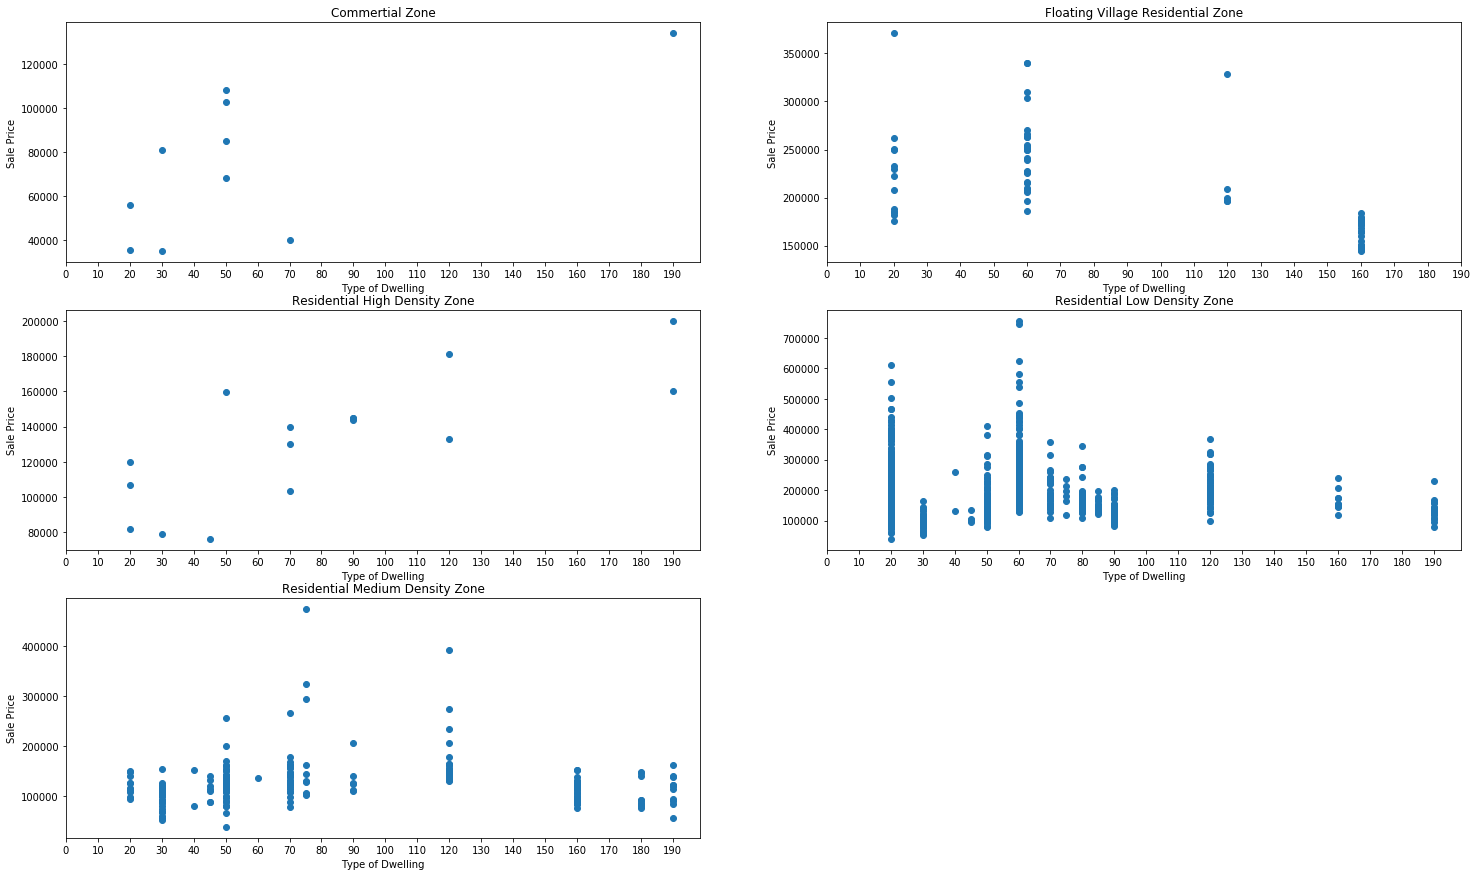

In [45]:
# Let's check the sales of houses depending on it's type and area they are in and visualize it on scatter plot
fig,axes = plt.subplots(3, 2, figsize=(25,15))

# Commertial Zone
axes[0,0].scatter(df_train[df_train['MSZoning']=='C (all)']['MSSubClass'], df_train[df_train['MSZoning']=='C (all)']['SalePrice'])
axes[0,0].set_xlabel('Type of Dwelling')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Commertial Zone')
axes[0,0].set_xticks(np.arange(0,df_train['MSSubClass'].unique().max()+10,10))

# Floating Village Residential Zone
axes[0,1].scatter(df_train[df_train['MSZoning']=='FV']['MSSubClass'], df_train[df_train['MSZoning']=='FV']['SalePrice'])
axes[0,1].set_xlabel('Type of Dwelling')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Floating Village Residential Zone')
axes[0,1].set_xticks(np.arange(0,df_train['MSSubClass'].unique().max()+10,10))

# Residential High Density Zone
axes[1,0].scatter(df_train[df_train['MSZoning']=='RH']['MSSubClass'], df_train[df_train['MSZoning']=='RH']['SalePrice'])
axes[1,0].set_xlabel('Type of Dwelling')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Residential High Density Zone')
axes[1,0].set_xticks(np.arange(0,df_train['MSSubClass'].unique().max()+10,10))

# Residential Low Density Zone
axes[1,1].scatter(df_train[df_train['MSZoning']=='RL']['MSSubClass'], df_train[df_train['MSZoning']=='RL']['SalePrice'])
axes[1,1].set_xlabel('Type of Dwelling')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Residential Low Density Zone')
axes[1,1].set_xticks(np.arange(0,df_train['MSSubClass'].unique().max()+10,10))

# Residential Medium Density Zone
axes[2,0].scatter(df_train[df_train['MSZoning']=='RM']['MSSubClass'], df_train[df_train['MSZoning']=='RM']['SalePrice'])
axes[2,0].set_xlabel('Type of Dwelling')
axes[2,0].set_ylabel('Sale Price')
axes[2,0].set_title('Residential Medium Density Zone')
axes[2,0].set_xticks(np.arange(0,df_train['MSSubClass'].unique().max()+10,10))

axes[2,1].remove() 

So, Maximum sales are in **'Residential Low Density Zone'** for Sub Class '60'.  
While 2nd is **'Residential Medium Density Zone'** for Sub Class '50'.

#### Street

Type of streets next to houses are ['Pave' 'Grvl']


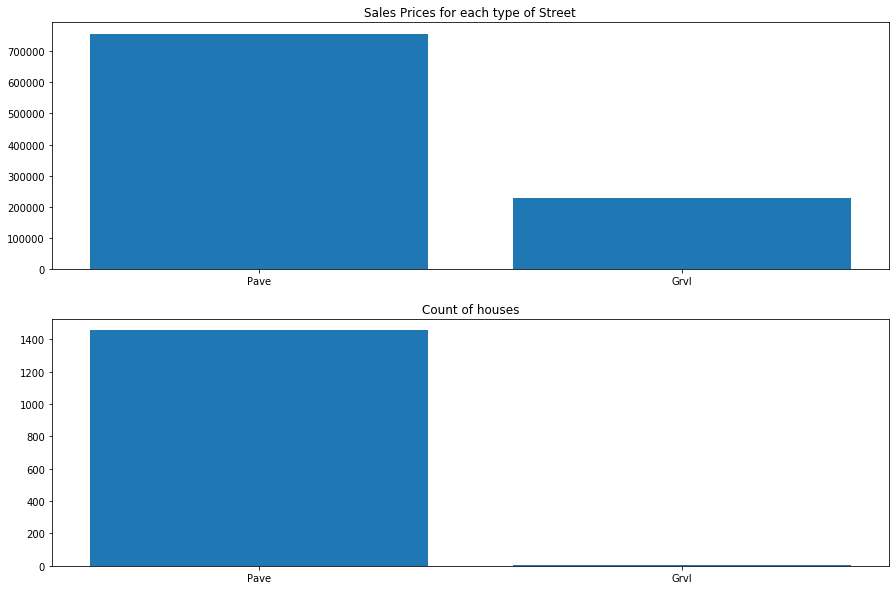

In [46]:
print('Type of streets next to houses are {}'.format(df_train['Street'].unique()))

fig, axes = plt.subplots(2, 1, figsize=(15,10))

axes[0].bar(df_train['Street'], df_train['SalePrice'])
axes[0].set_title('Sales Prices for each type of Street')

axes[1].bar(df_train['Street'].unique(), list(df_train['Street'].value_counts()))
axes[1].set_title('Count of houses')

plt.show()

Here, maximum houses sold were having Paved street and we can eliminate the column 'Street' in our further study.
#### Alley

Type of Alley next to houses are ['NA' 'Grvl' 'Pave']


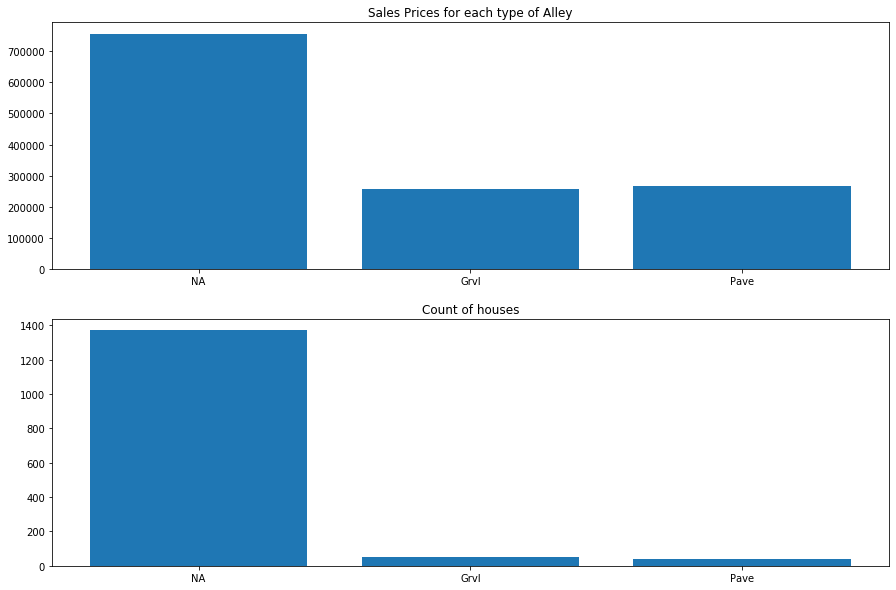

In [47]:
print('Type of Alley next to houses are {}'.format(df_train['Alley'].unique()))

fig, axes = plt.subplots(2, 1, figsize=(15,10))

axes[0].bar(df_train['Alley'], df_train['SalePrice'])
axes[0].set_title('Sales Prices for each type of Alley')

axes[1].bar(df_train['Alley'].unique(), list(df_train['Alley'].value_counts()))
axes[1].set_title('Count of houses')

plt.show()

Here also, the maximum houses sold were not knowing what kind of alley was connected to the house.  
#### Utilities

Types of Utilies present in sold houses are ['AllPub' 'NoSeWa']


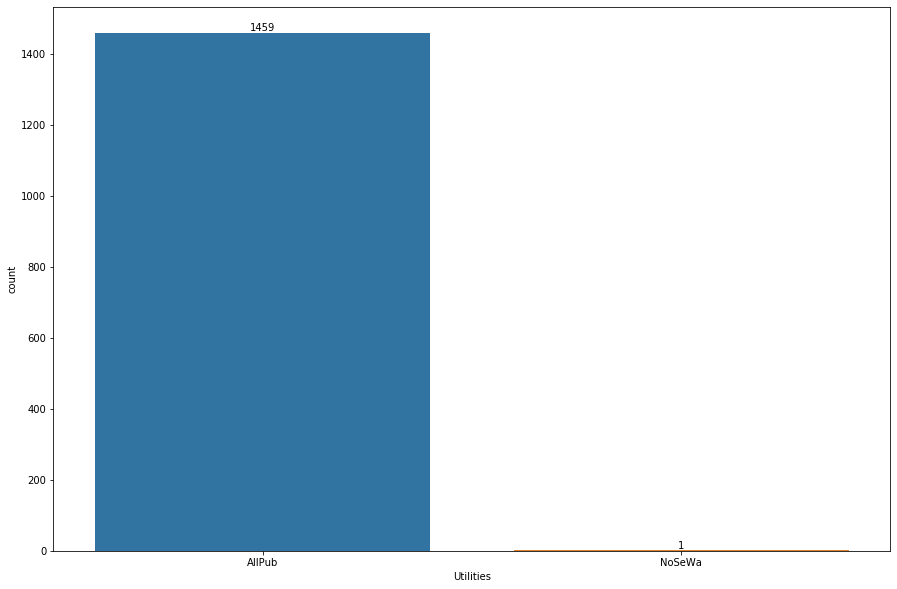

In [48]:
print('Types of Utilies present in sold houses are {}'.format(df_train['Utilities'].unique()))
fig = plt.figure(figsize=(15,10))

ax = sns.countplot(df_train['Utilities'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+5), ha='center')

Most of the houses have all the utilities exept 1, so let's definitely get rid of this column for model slection.

In [49]:
df_train.drop('Utilities', axis=1, inplace=True)

#### Let's have a look at the Land Area around the houses mentioned and their relation with Sale Price
There are 2 fields which are related to the Land around the property.  
1. Land Slope
2. Land Contour

Type of Land Slopes are ['Gtl' 'Mod' 'Sev']
Type of Land Contours are ['Lvl' 'Bnk' 'Low' 'HLS']


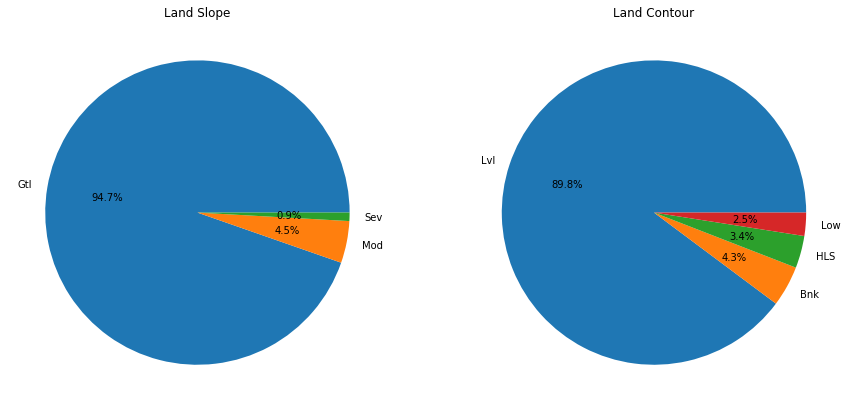

In [50]:
print('Type of Land Slopes are {}'.format(df_train['LandSlope'].unique()))
print('Type of Land Contours are {}'.format(df_train['LandContour'].unique()))
fig, ax = plt.subplots(1, 2, figsize=(15,10))

# Plotting Land Slope
ax[0].set_title('Land Slope')  
ax[0].pie(df_train['LandSlope'].value_counts(), labels=df_train['LandSlope'].value_counts().index, autopct='%1.1f%%')

# Plotting Land Contour:
ax[1].pie(df_train['LandContour'].value_counts(), labels=df_train['LandContour'].value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Land Contour')

plt.show()

Here, more than 90% of the houses have nearly Flat Contour and gentle slope.
#### Neighborhood

List of Neighborhoods around the houses:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


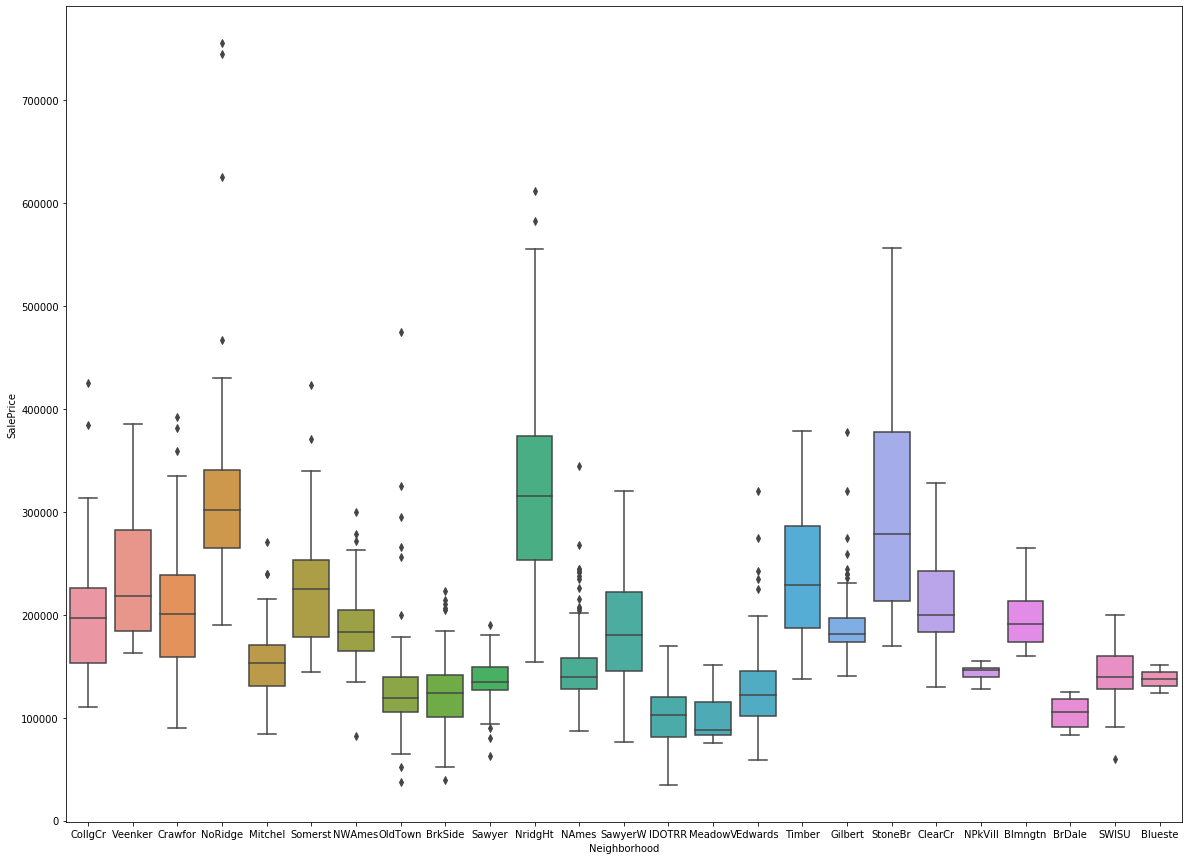

In [51]:
print('List of Neighborhoods around the houses:\n{}'.format(df_train['Neighborhood'].unique()))
fig = plt.figure(figsize=(20,15))

sns.boxplot(df_train['Neighborhood'], df_train['SalePrice'])

plt.show()

Here there are a lot of variations in the Sale Prices with respect to the Neighborhood.  
We can a lot of sales in **'Stone Brook'** area while very few in **'Northpark Villa'**.  
  
Let us also check the **proximity of various conditions** i.e. if the house is near any train station or any specific street.

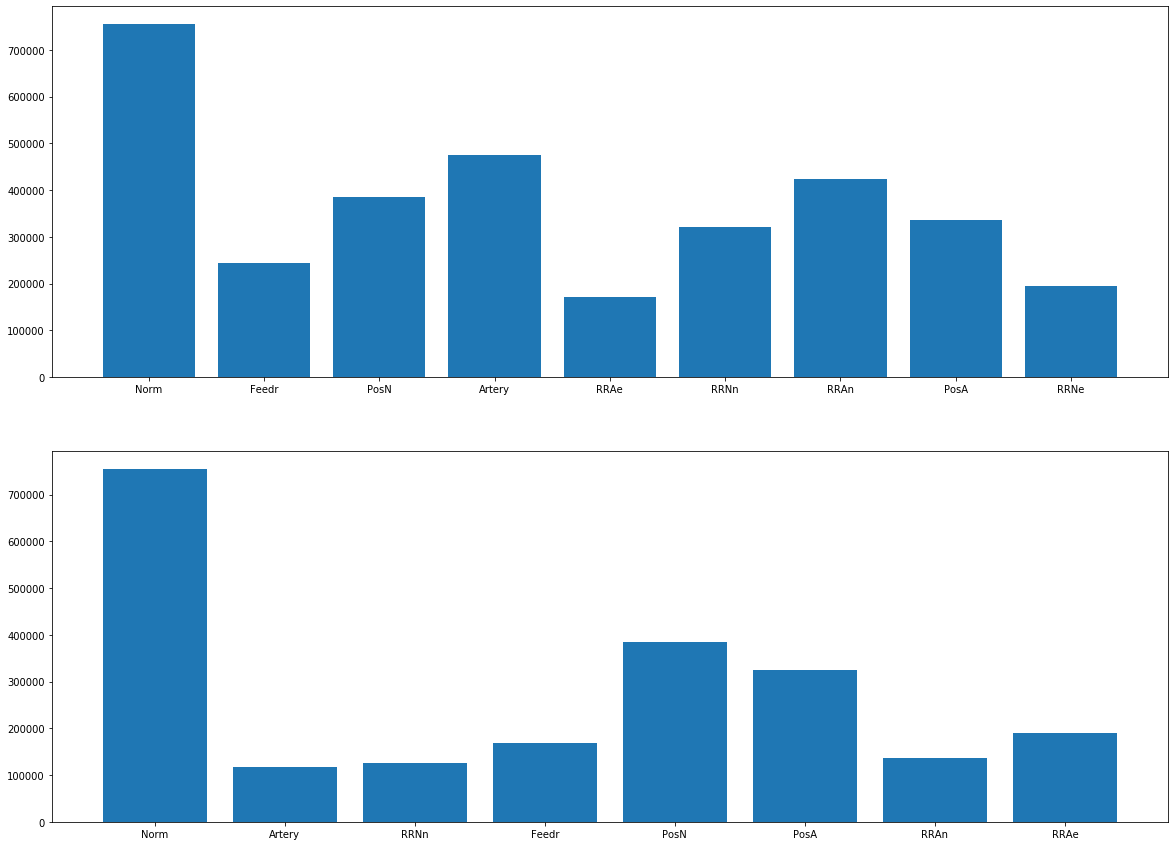

In [52]:
# Check the other proximities
fig, axes = plt.subplots(2, 1, figsize=(20,15))

axes[0].bar(df_train['Condition1'], df_train['SalePrice'])
axes[1].bar(df_train['Condition2'], df_train['SalePrice'])

plt.show()

#### Overall Condition & Overall Quality
Price of any obejct definitely depends on it;s quality and material used. Let's visualize the quality and material used in sold houses.

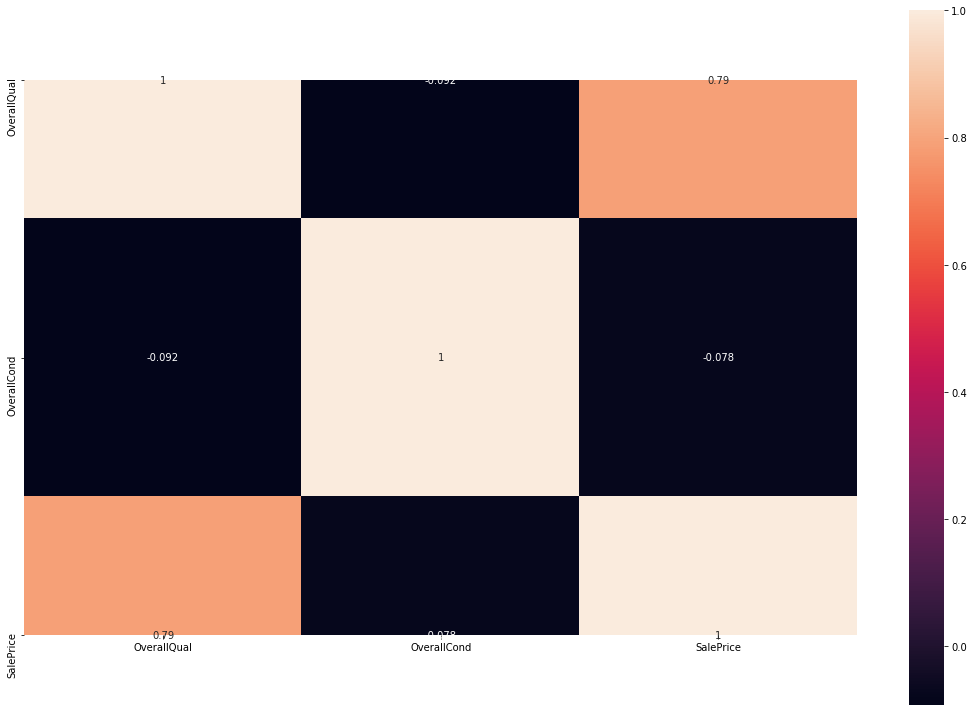

In [53]:
plt.subplots(figsize=(15,10))

sns.heatmap(df_train[['OverallQual', 'OverallCond', 'SalePrice']].corr(), vmax=1.0, annot=True, square=True)
plt.tight_layout()

plt.show()

Here we can see that Overall Condition have very less correlation with SalePrice while Overall Quality is positively correlated with the Sale Price of house.  

#### Year Built (YearBuilt) & Year Remodeled (YearRemodAdd)
Year of built is also one of the important factor considered while buying a house. On top of that, if it is remodeled then the house will be considered in a better shape.  
Let us check the built years we have and their respective prices.

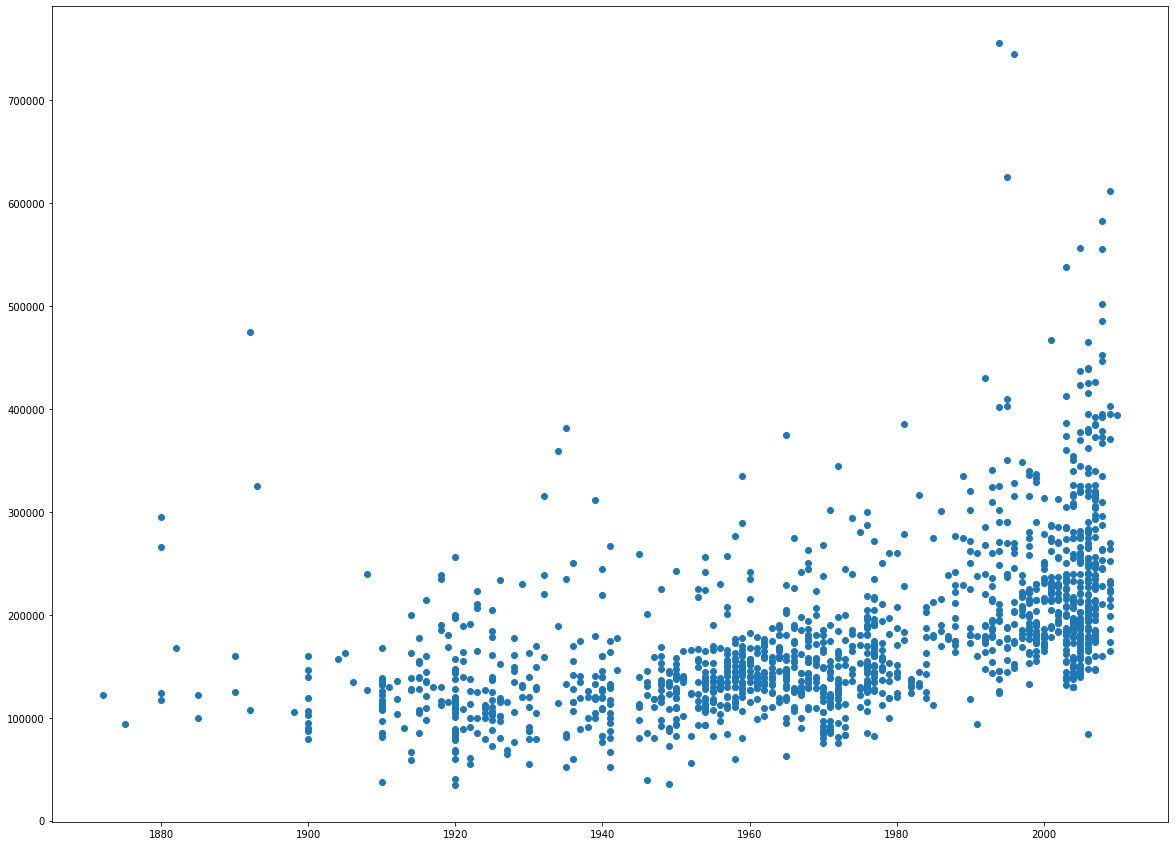

In [54]:
fig = plt.figure(figsize=(20,15))

plt.scatter(df_train['YearBuilt'], df_train['SalePrice'])

plt.show()

The latest the house, the higher the price and more number of sales.

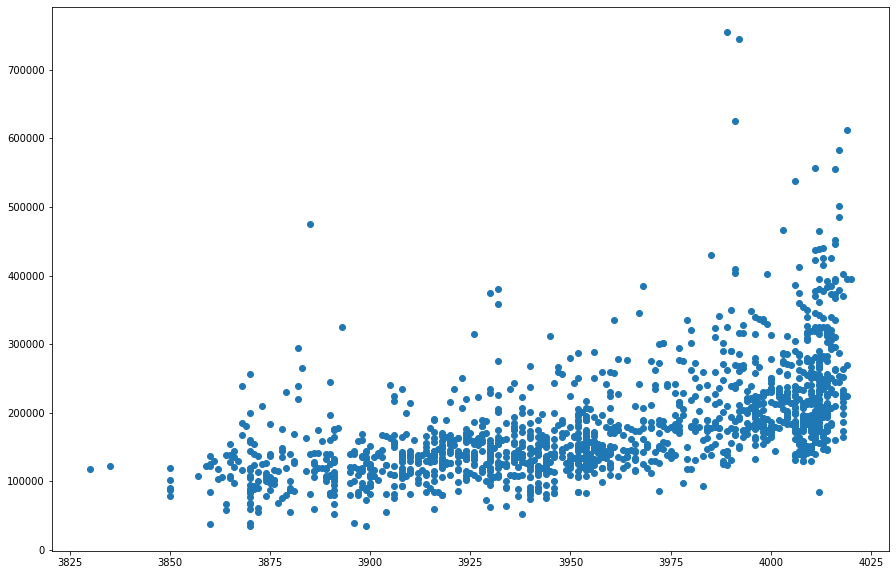

In [55]:
# Let's check how many of these houses are remodeled and their affect on Sale Price.
df_train['Remodeled'] = df_train['YearRemodAdd'] + df_train['YearBuilt']

fig=plt.figure(figsize=(15,10))
plt.scatter(df_train['Remodeled'], df_train['SalePrice'])
plt.show()

From here, we can say that the latest the house built or remodeled, the higher the price and more number of sale.
#### Roof 
**'Roof Material'** is common over 98% of houses. So, lets not consider this column and focus on **'Roof Style'**.

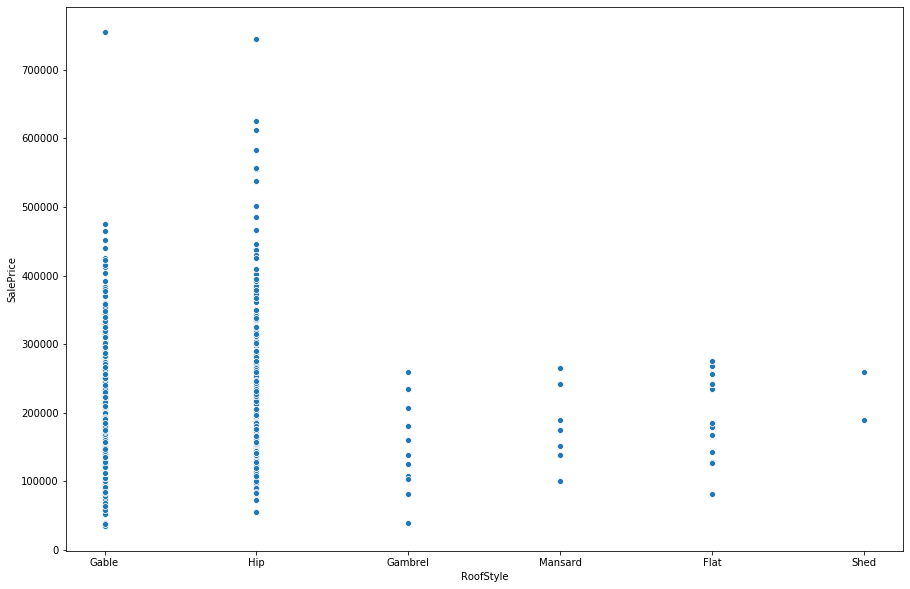

In [56]:
fig = plt.figure(figsize=(15,10))

sns.scatterplot(df_train['RoofStyle'], df_train['SalePrice'])

plt.show()

#### Exterior
This will cover the fields like **'Exterior1st'**, **'Exterior2nd'**, **'MasVnrType'**, **'MasVnrArea'**, **'ExterQual'** and **'ExterCond'**.  
Let's study the relation of these variables with Sale Price of house.

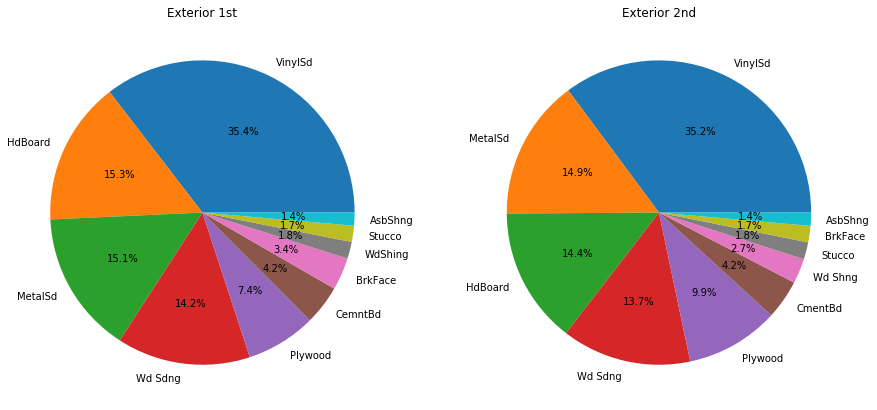

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

# Plotting Exterior 1st
ax[0].set_title('Exterior 1st')  
ax[0].pie(df_train['Exterior1st'].value_counts()[:10], labels=df_train['Exterior1st'].value_counts().index[:10], autopct='%1.1f%%')

# Plotting Exterior 2nd:
ax[1].set_title('Exterior 2nd')
ax[1].pie(df_train['Exterior2nd'].value_counts()[:10], labels=df_train['Exterior2nd'].value_counts().index[:10], autopct='%1.1f%%')

plt.show()

#### Masonry Veneer
Let's check the wall types

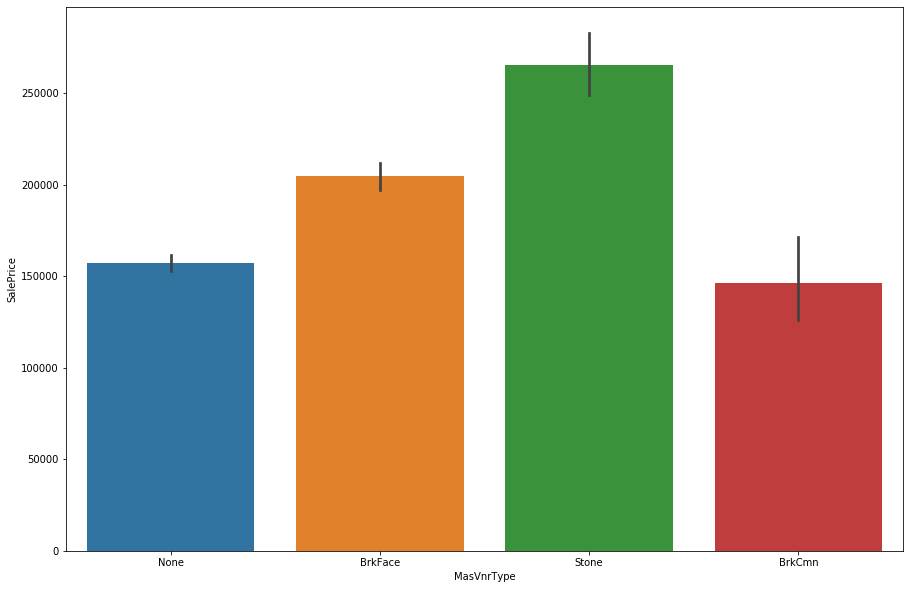

In [58]:
fig = plt.figure(figsize=(15,10))

sns.barplot(df_train['MasVnrType'], df_train['SalePrice'], order=df_train['MasVnrType'].value_counts().index)

plt.show()

Here, most of the houses do not have Masonre Veneer type and their average price is around $150K.
Let's check Exterior house material quality and condition.

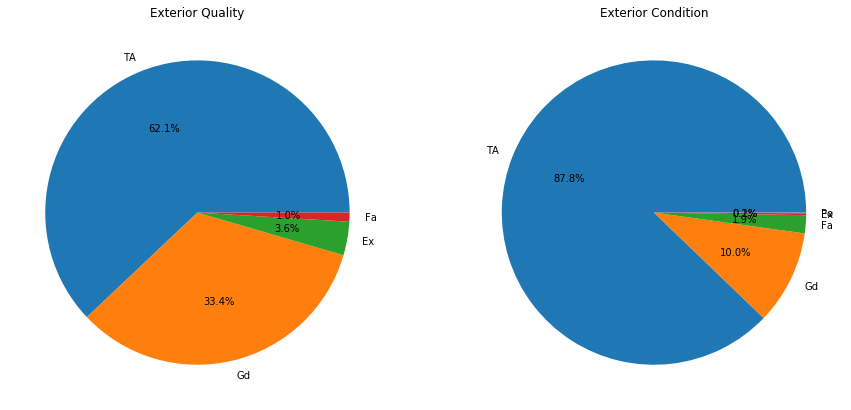

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

# Plotting Exterior Quality
ax[0].set_title('Exterior Quality')  
ax[0].pie(df_train['ExterQual'].value_counts(), labels=df_train['ExterQual'].value_counts().index, autopct='%1.1f%%')

# Plotting Exterior Condition:
ax[1].set_title('Exterior Condition')
ax[1].pie(df_train['ExterCond'].value_counts(), labels=df_train['ExterCond'].value_counts().index, autopct='%1.1f%%')

plt.show()

#### Does Foundation of house decides it's selling price?

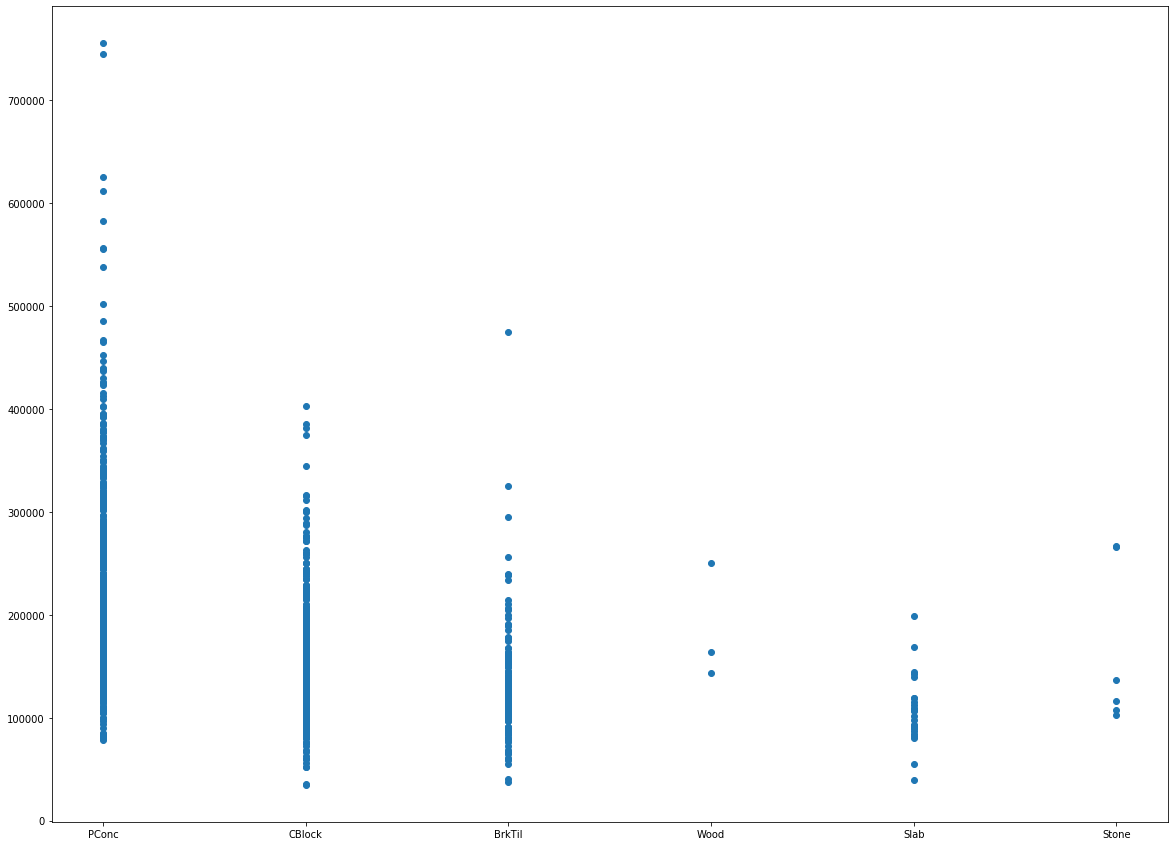

In [60]:
fig = plt.figure(figsize=(20,15))

plt.scatter(df_train['Foundation'], df_train['SalePrice'])

plt.show()

Houses with **Poured Contrete** have higher sales with high prices. While houses with **wood** foundation have least sales.
#### Basement
Let's explore the role of Basement in deciding the selling price of the house. 
Following are the fields which we are going to study:
1. Basement Quality
2. Basement Condition
3. Basement Exposure
4. Basement Finish Type 1
5. Basement Finish Type 2
6. Unfinished Basement Area (sq.ft.)
7. Total Basement Area (sq.ft.)

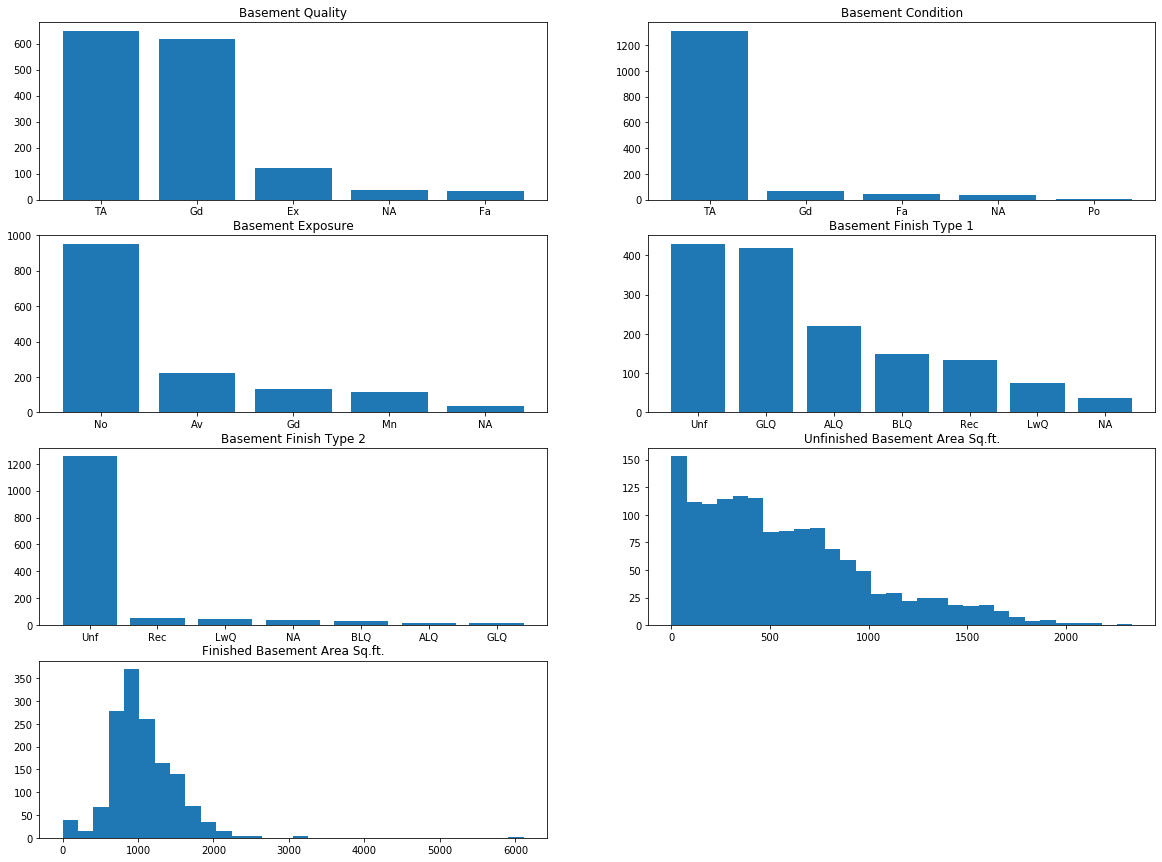

In [61]:
# Basement Quality and Condition
fig, ax = plt.subplots(4, 2, figsize=(20,15))

# Plotting Basement Quality:
ax[0,0].set_title('Basement Quality')  
ax[0,0].bar(df_train['BsmtQual'].value_counts().index, df_train['BsmtQual'].value_counts())

# Plotting Basement Condition:
ax[0,1].set_title('Basement Condition')
ax[0,1].bar(df_train['BsmtCond'].value_counts().index, df_train['BsmtCond'].value_counts())

# Plotting Basement Exposure:
ax[1,0].set_title('Basement Exposure')
ax[1,0].bar(df_train['BsmtExposure'].value_counts().index, df_train['BsmtExposure'].value_counts())

# Plotting Basement Finish Type 1:
ax[1,1].set_title('Basement Finish Type 1')
ax[1,1].bar(df_train['BsmtFinType1'].value_counts().index, df_train['BsmtFinType1'].value_counts())

# Plotting Basement Finish Type 2:
ax[2,0].set_title('Basement Finish Type 2')
ax[2,0].bar(df_train['BsmtFinType2'].value_counts().index, df_train['BsmtFinType2'].value_counts())

# Plotting Unfinished Basement Area
ax[2,1].set_title('Unfinished Basement Area Sq.ft.')
ax[2,1].hist(df_train['BsmtUnfSF'], bins=30)

# Plotting Unfinished Basement Area
ax[3,0].set_title('Finished Basement Area Sq.ft.')
ax[3,0].hist(df_train['TotalBsmtSF'], bins=30)

# Remove the last figure
ax[3,1].remove()

plt.show()

Next feature is **'Heating'**, but it's **97.81%** have repetitive data and hence let's eliminate this factor.
Let's check how many houses have **'Central Air'** .

In [62]:
df_train['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

So, we can see maximum houses have Central Air. Let's check it's affect on Sale Price of the house.

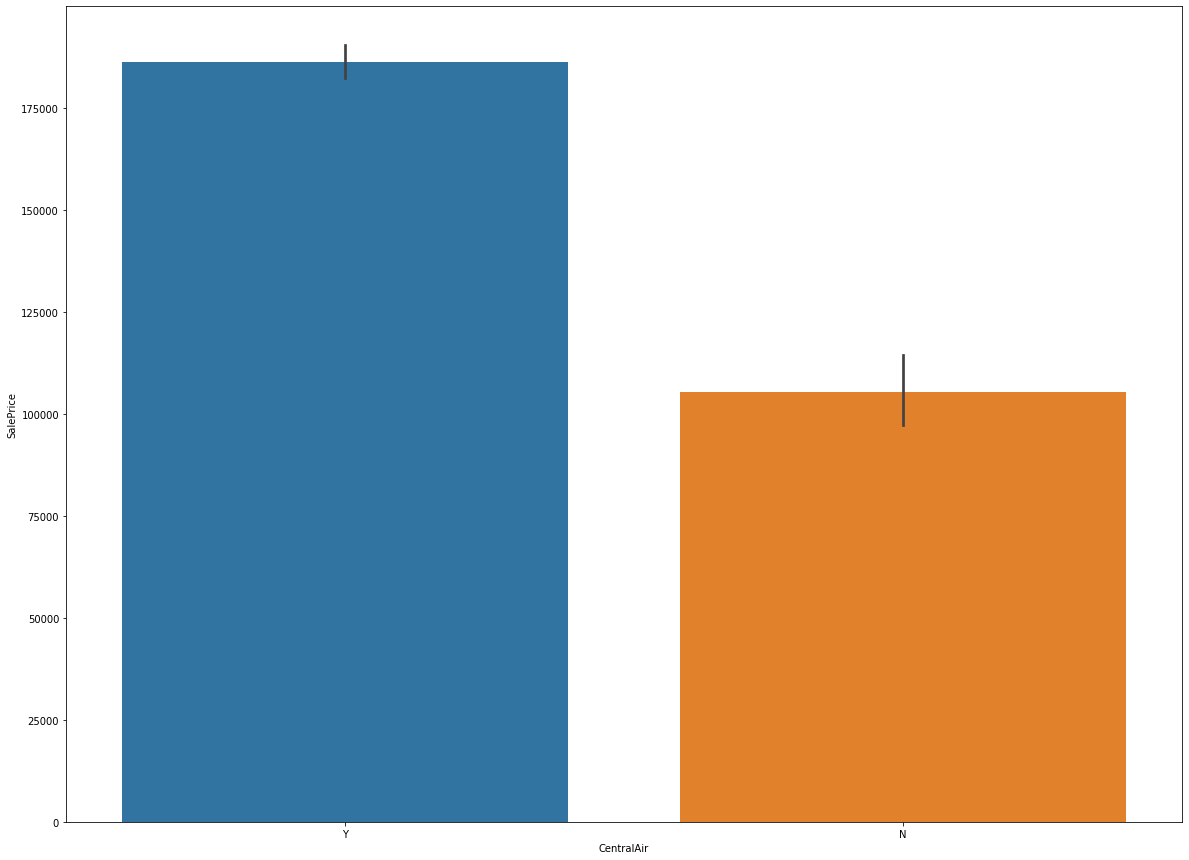

In [63]:
fig = plt.figure(figsize=(20,15))

sns.barplot(df_train['CentralAir'], df_train['SalePrice'])

plt.show()

Obviously the houses with 'Central Air' are costlier than the one who doesn't.
#### Electric Connections (Electrical)

Count of houses with different types of Electricals:
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


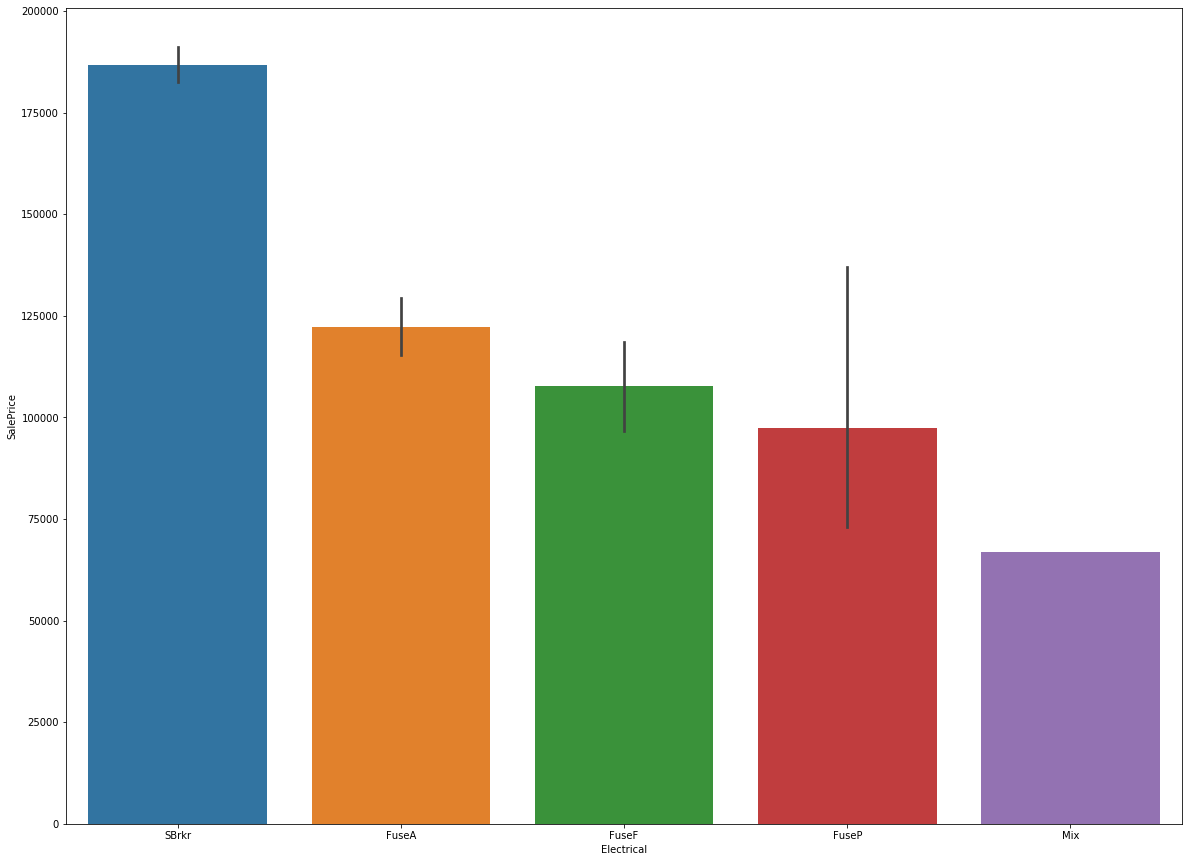

In [64]:
print('Count of houses with different types of Electricals:')
print(df_train['Electrical'].value_counts())

fig = plt.figure(figsize=(20,15))

sns.barplot(df_train['Electrical'], df_train['SalePrice'], order=df_train['Electrical'].value_counts().index)

plt.show()

Maximum houses have Electrical type **'Standard Circuit Breakers & Romex'** and these houses have high selling price.
#### Living Area Sq.ft.

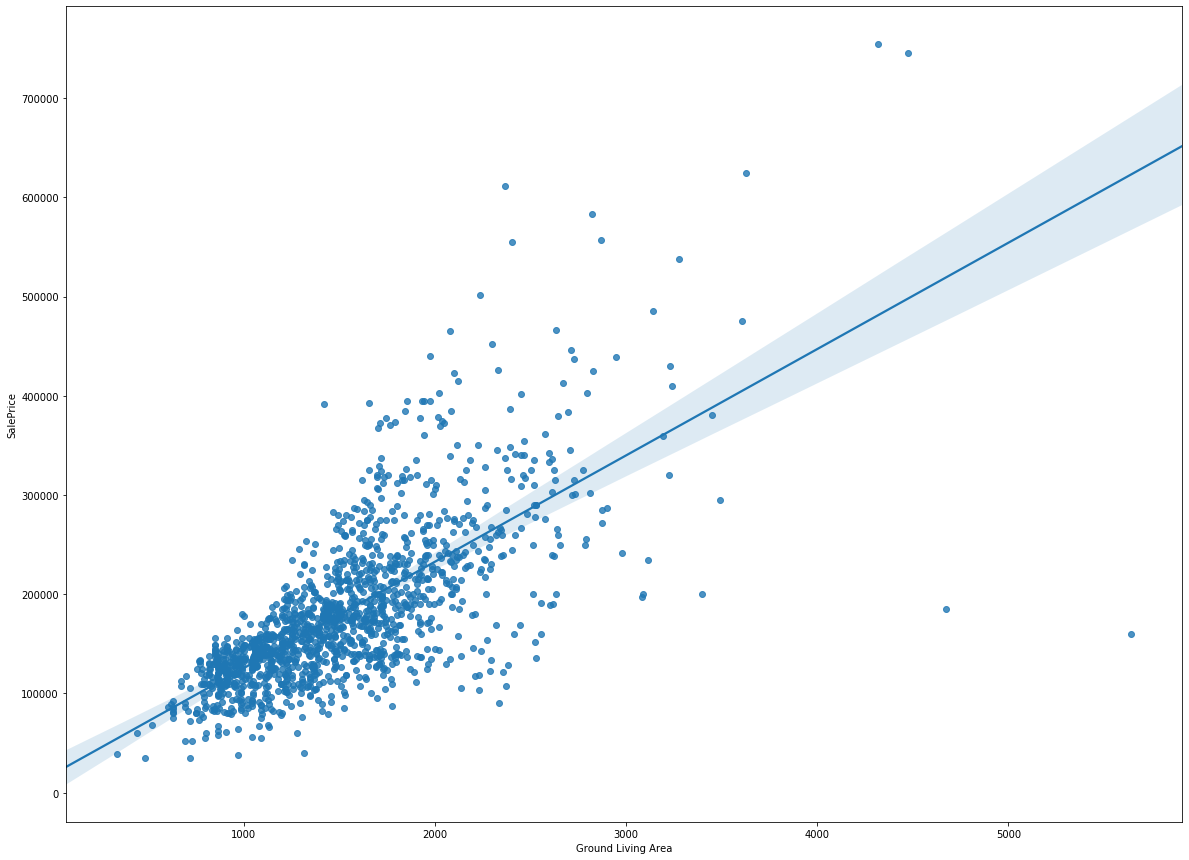

In [65]:
fig = plt.figure(figsize=(20,15))

sns.regplot(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel('Ground Living Area')

plt.show()

Definitely, the Price of house increases as the **'Ground Living Area'**.  
Let's check the effect of 1st Floor and 2nd Floor's sq.ft. area on Sale Price.

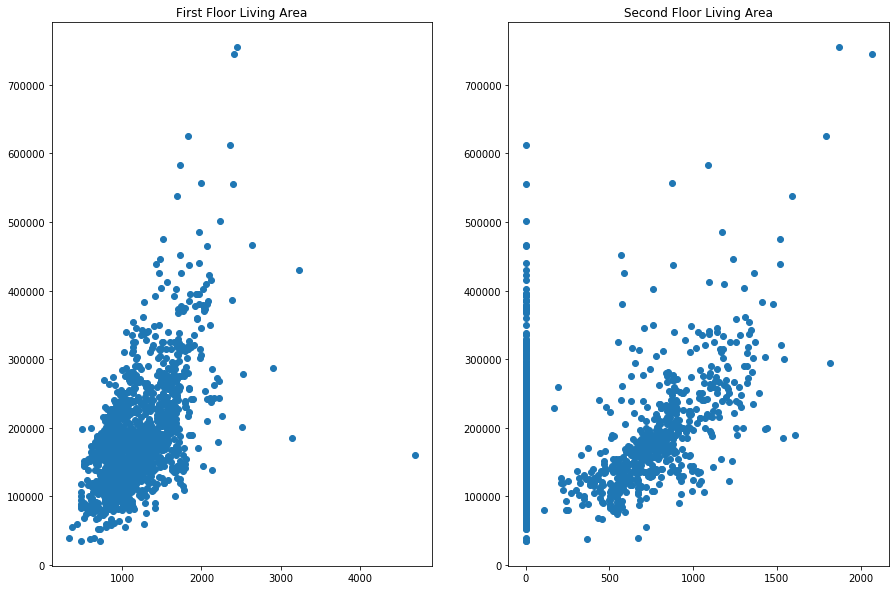

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

ax[0].scatter(df_train['1stFlrSF'], df_train['SalePrice'])
ax[0].set_title('First Floor Living Area')

ax[1].scatter(df_train['2ndFlrSF'], df_train['SalePrice'])
ax[1].set_title('Second Floor Living Area')

plt.show()

Here also, the sale price increases with increase in sq. ft. area on both the floor.  
While creating model, these fields can be combined in feature engineering.

#### Bathroom
This is a very important deciding factor while buying a house, so definitely the selling price will be affected by the type of bath available in house.  
Let's visualize the types and counts of bath available.

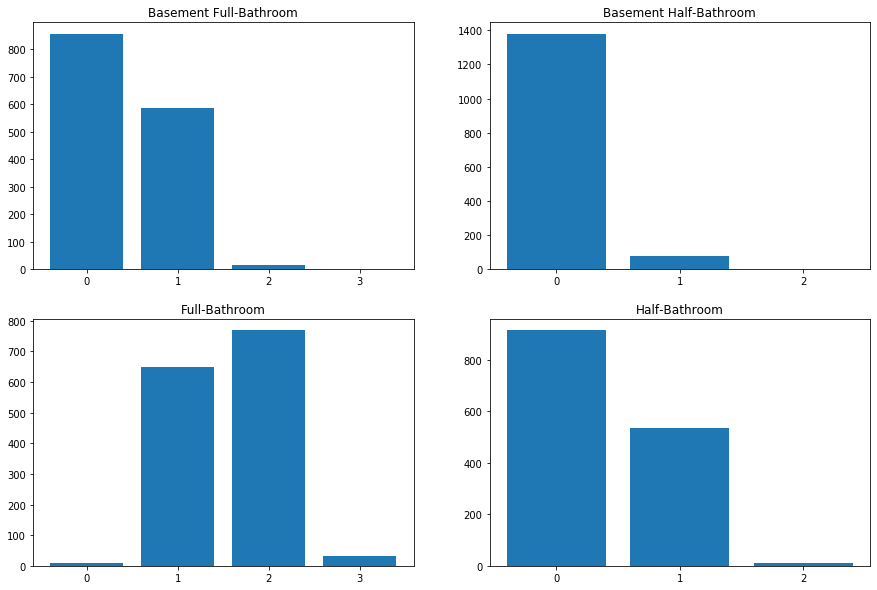

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# Plotting Basement Full-Bathroom:
ax[0,0].set_title('Basement Full-Bathroom')  
ax[0,0].bar(df_train['BsmtFullBath'].value_counts().index, df_train['BsmtFullBath'].value_counts())
ax[0,0].set_xticks(df_train['BsmtFullBath'].unique())

# Plotting Basement Half-Bathroom:
ax[0,1].set_title('Basement Half-Bathroom')  
ax[0,1].bar(df_train['BsmtHalfBath'].value_counts().index, df_train['BsmtHalfBath'].value_counts())
ax[0,1].set_xticks(df_train['BsmtHalfBath'].unique())

# Plotting Full-Bathroom:
ax[1,0].set_title('Full-Bathroom')  
ax[1,0].bar(df_train['FullBath'].value_counts().index, df_train['FullBath'].value_counts())
ax[1,0].set_xticks(df_train['FullBath'].unique())

# Plotting Half-Bathroom:
ax[1,1].set_title('Half-Bathroom')  
ax[1,1].bar(df_train['HalfBath'].value_counts().index, df_train['HalfBath'].value_counts())
ax[1,1].set_xticks(df_train['HalfBath'].unique())

plt.show()

Houses with 2 bath are sold the most..!!
#### Bedroom & Kitchen
Let's check how many bedroom and kitchen, houses are being sold the most.

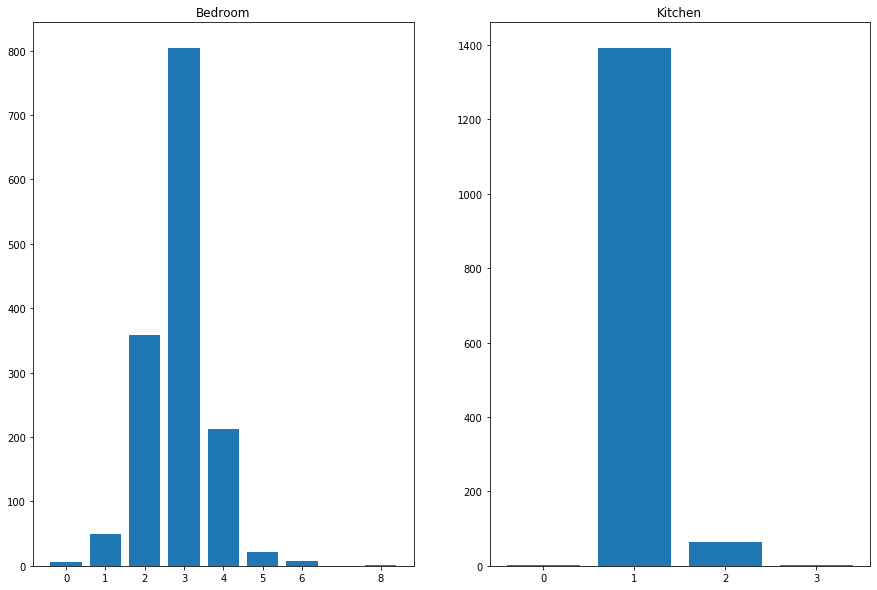

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15,10)) 

ax[0].set_title('Bedroom')
ax[0].bar(df_train['BedroomAbvGr'].value_counts().index, df_train['BedroomAbvGr'].value_counts())
ax[0].set_xticks(df_train['BedroomAbvGr'].value_counts().index)

ax[1].set_title('Kitchen')
ax[1].bar(df_train['KitchenAbvGr'].value_counts().index, df_train['KitchenAbvGr'].value_counts())
ax[1].set_xticks(df_train['KitchenAbvGr'].value_counts().index)

plt.show()

#### Total Number of rooms in house (TotRmsAbvGrd)
Let's check the price of house based on total number of houses.

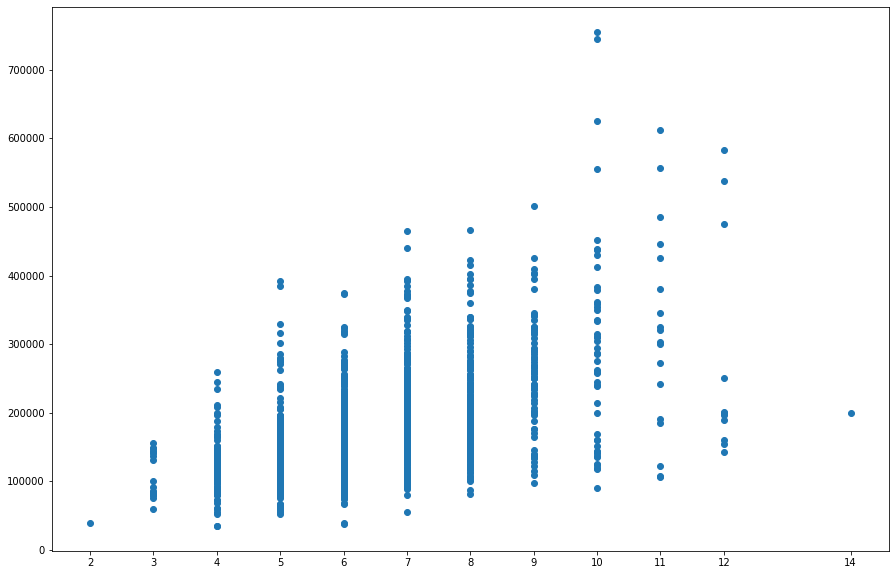

In [69]:
fig = plt.figure(figsize=(15,10))

plt.scatter(df_train['TotRmsAbvGrd'], df_train['SalePrice'])
plt.xticks(df_train['TotRmsAbvGrd'].value_counts().index)

plt.show()

Most of the houses sold were having total number of rooms from **4** till **10**.
#### Fire Place
Let's check the importance of fireplace.

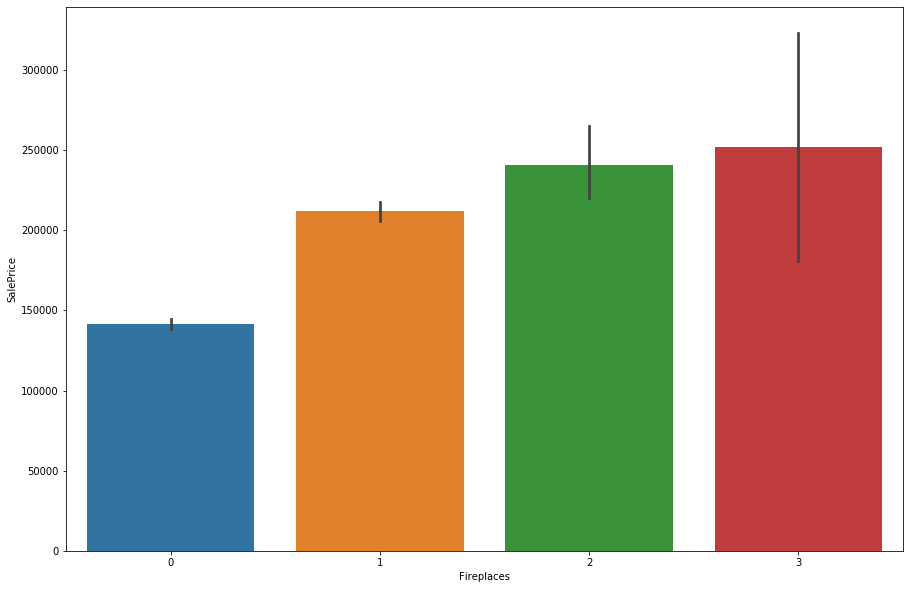

In [70]:
fig = plt.figure(figsize=(15,10))

sns.barplot(df_train['Fireplaces'], df_train['SalePrice'], order=df_train['Fireplaces'].value_counts().index)

plt.show()

#### Garage
Here also, there are lot of factors if we check the garage and they are listed below:
1. Garage Type
2. Garage Year Built
3. Garage Finish
4. Garage Cars (counts of cars that would fit in)
5. Garage Area (Sq.ft.)
6. Garage Quality 
7. Garage Condition
8. Paved Drive

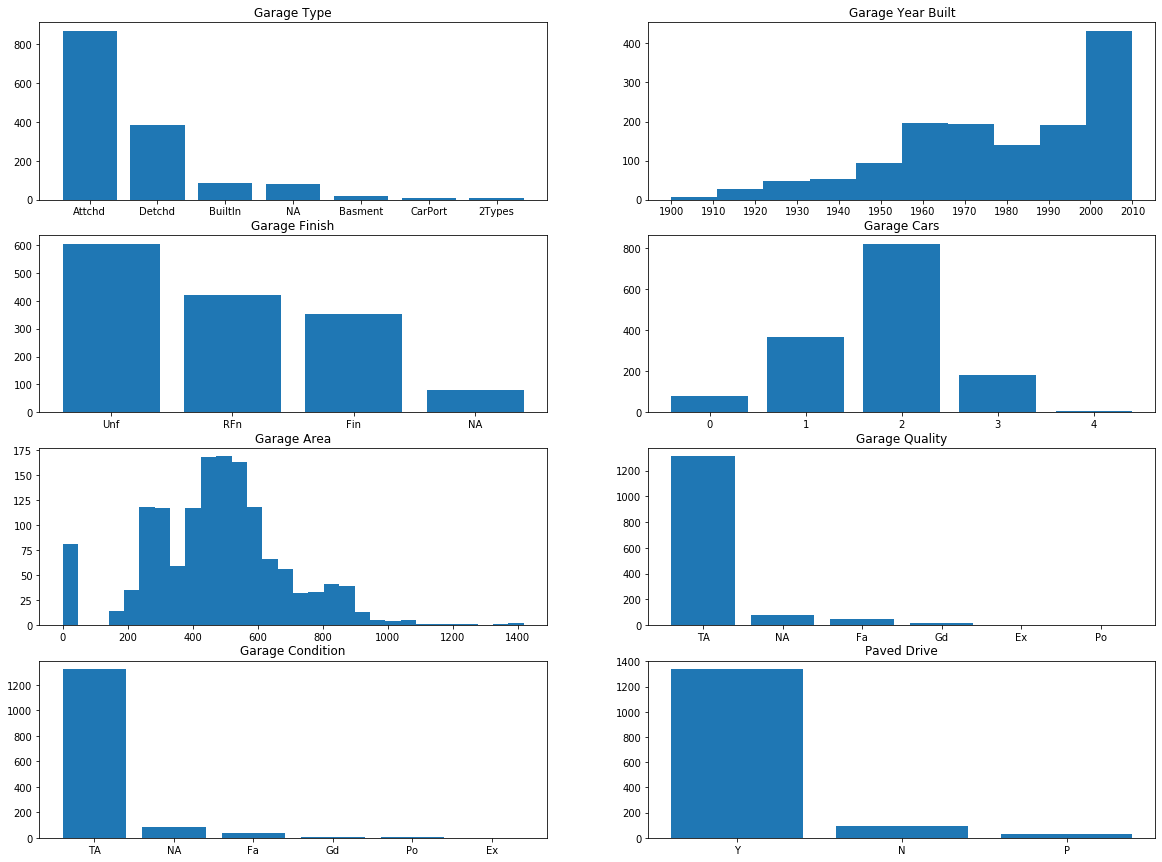

In [71]:
# Garage details plot
fig, ax = plt.subplots(4, 2, figsize=(20,15))

# Plotting Garage Type:
ax[0,0].set_title('Garage Type')  
ax[0,0].bar(df_train['GarageType'].value_counts().index, df_train['GarageType'].value_counts())

# Plotting Garage Year Built:
ax[0,1].set_title('Garage Year Built')
ax[0,1].hist(df_train[df_train['GarageYrBlt']!=0]['GarageYrBlt'])
ax[0,1].set_xticks(np.arange(df_train[df_train['GarageYrBlt']!=0]['GarageYrBlt'].min(), df_train['GarageYrBlt'].max()+10, 10))

# Plotting Garage Finish:
ax[1,0].set_title('Garage Finish')
ax[1,0].bar(df_train['GarageFinish'].value_counts().index, df_train['GarageFinish'].value_counts())

# Plotting Garage Cars:
ax[1,1].set_title('Garage Cars')
ax[1,1].bar(df_train['GarageCars'].value_counts().index, df_train['GarageCars'].value_counts())

# Plotting Garage Area:
ax[2,0].set_title('Garage Area')
ax[2,0].hist(df_train['GarageArea'],bins=30)

# Plotting Garage Quality:
ax[2,1].set_title('Garage Quality')
ax[2,1].bar(df_train['GarageQual'].value_counts().index, df_train['GarageQual'].value_counts())

# Plotting Garage Condition:
ax[3,0].set_title('Garage Condition')
ax[3,0].bar(df_train['GarageCond'].value_counts().index, df_train['GarageCond'].value_counts())

# Plotting Paved Drive
ax[3,1].set_title('Paved Drive')
ax[3,1].bar(df_train['PavedDrive'].value_counts().index, df_train['PavedDrive'].value_counts())

plt.show()

#### Pool
**'Pool Area'** and **'Pool Quality' (PoolQC)** have 99.52% similar data.  
But still let's check the prices of houses which do have pool and which do not. If the prices vary too much then only this field will be useful in further modelling.

In [72]:
df_train.groupby('PoolArea')['SalePrice'].agg(['count', 'mean'])

count           mean
PoolArea                      
0          1453  180404.663455
480           1  160000.000000
512           1  235000.000000
519           1  250000.000000
555           1  745000.000000
576           1  171000.000000
648           1  181000.000000
738           1  274970.000000

There are only 7 houses which had pool, but their price is not in one range, so pool is not the most effective factor in deciding the price of house.

#### Fence

In [73]:
df_train.groupby('Fence')['SalePrice'].agg(['count', 'mean'])

count           mean
Fence                      
GdPrv     59  178927.457627
GdWo      54  140379.314815
MnPrv    157  148751.089172
MnWw      11  134286.363636
NA      1179  187596.837998

Most of the houses do not have fence, but the average sale price of house is almost same for the houese which have fence and which do not and hence this field can be dropped while getting the sale price of the house.
#### Month and Year Sold
Let us check in which year of the month the houses were the sold the most.

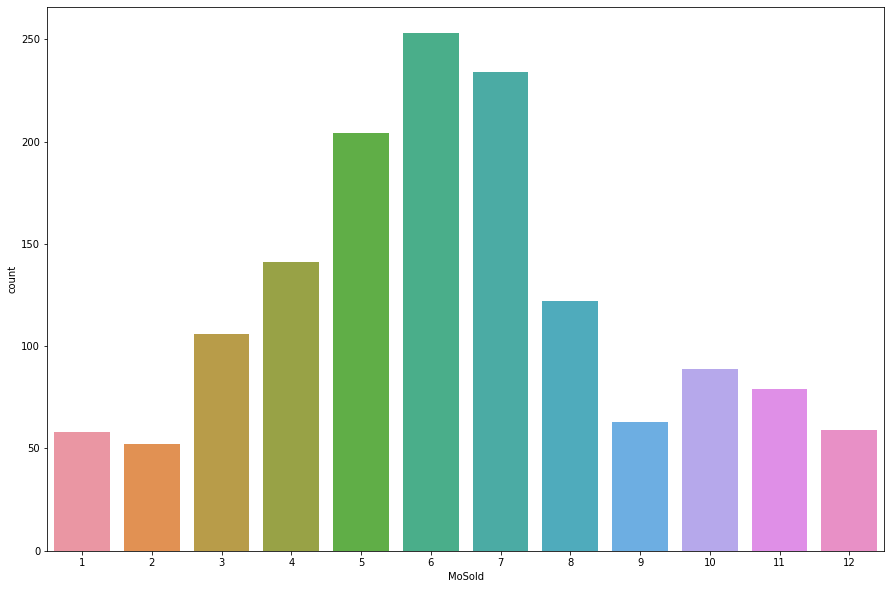

In [79]:
fig = plt.figure(figsize=(15,10))

sns.countplot(df_train['MoSold'])

plt.show()

It is noticed that the houses are sold the most in the month of June.  
Let's calculate age of the house during sell. (Age will calculated on year built or year remodeled if there was remodeling done.

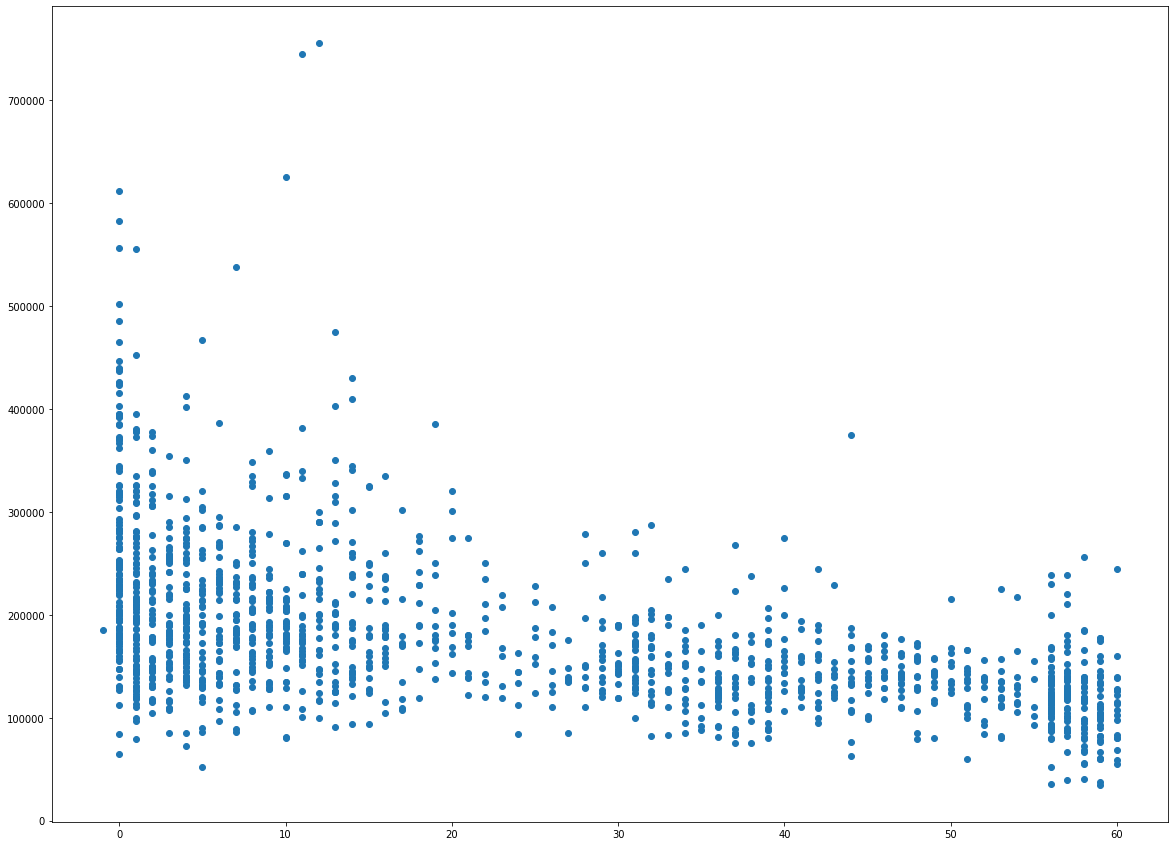

In [85]:
age = []

for i in df_train.index:
    if df_train['YearBuilt'][i] == df_train['YearRemodAdd'][i]:
        age.append(df_train['YrSold'][i] - df_train['YearBuilt'][i])
    else:
        age.append(df_train['YrSold'][i] - df_train['YearRemodAdd'][i])
        
df_train['Age'] = age

# Plot the age and Sale Price
fig = plt.figure(figsize=(20,15))

plt.scatter(df_train['Age'], df_train['SalePrice'])

plt.show()

Again, as newer the house, higher the price and high number of sales.  
#### Sale Type & Condition

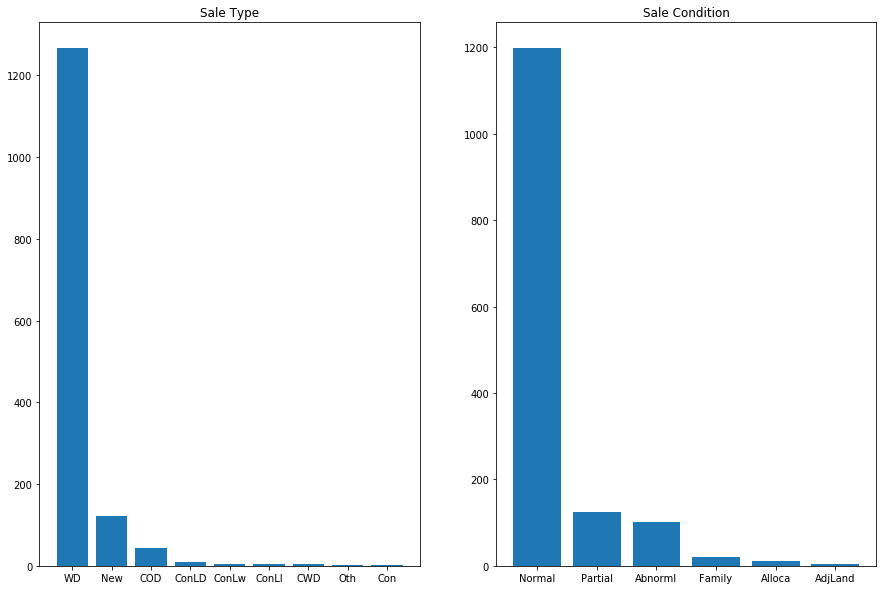

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(15,10))

# Plotting Sale Type
ax[0].set_title('Sale Type')  
ax[0].bar(df_train['SaleType'].value_counts().index, df_train['SaleType'].value_counts())

# Plotting Sale Condition:
ax[1].set_title('Sale Condition')
ax[1].bar(df_train['SaleCondition'].value_counts().index, df_train['SaleCondition'].value_counts())

plt.show()

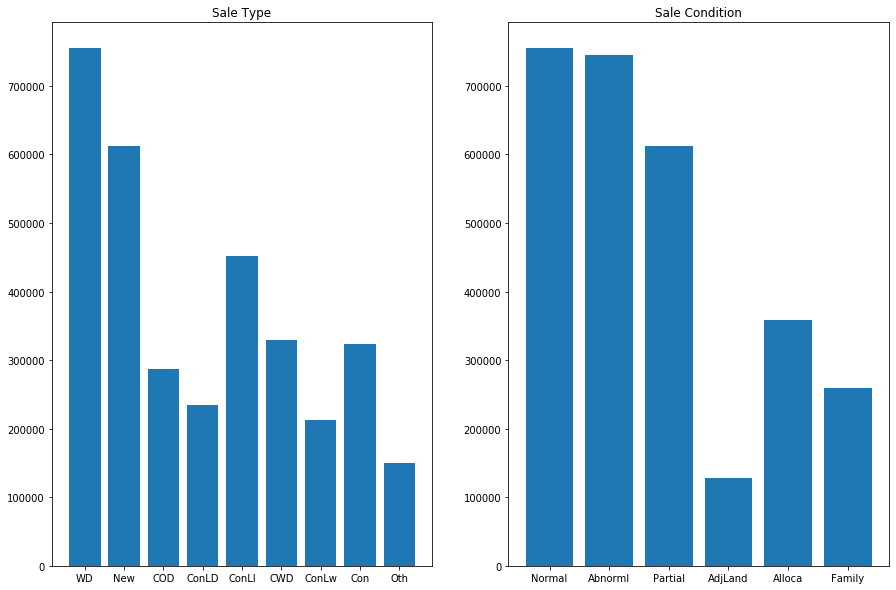

In [90]:
# Check Sale Price with respect to Sale Type and Condition
fig, ax = plt.subplots(1, 2, figsize=(15,10))

# Plotting Sale Type
ax[0].set_title('Sale Type')  
ax[0].bar(df_train['SaleType'], df_train['SalePrice'])

# Plotting Sale Condition:
ax[1].set_title('Sale Condition')
ax[1].bar(df_train['SaleCondition'], df_train['SalePrice'])

plt.show()